<a href="https://colab.research.google.com/github/ValentineKarimi/Supervised-and-Unsupervised-R-Kira-Plastinina-and-online-course/blob/main/Kira_Plastinina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Definition**


**a) Specifying the Data Analytic Question**


> As a Data Science Consultant, I have been employed by Kira Plastinina brand’s Sales and Marketing team. They  would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.



**b) Defining the Metric for Success**



> * Perform clustering stating insights drawn from your analysis and visualizations.





> * Upon implementation, provide comparisons between K-Means clustering and Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 





**c) Understanding the context**


> There have been opened over 120 Kira Plastinina signature stores in different parts of the world: Russia, Ukraine, Italy, Great Britain, USA, China, Philippines, etc.. The stores present the collections of apparel, shoes, perfumes and accessories. In Russia, there have been opened 34 Kira Plastinina stores in Moscow, plus, the brand’s network embraces 100 cities and towns of Russia. 


**d) Recording the Experimental Design**

* Problem Definition
* Data Sourcing
* Check the Data
* Perform Data Cleaning
* Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
* Implement the Solution
* Challenge the Solution
* Follow up Questions

**e) Data Relevance**

> The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

> "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.

> The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

> The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

> The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

> The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

> The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

> The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



#**Data Sourcing**

In [1]:
#Installing packages 
#  
install.packages('tidyverse')
install.packages('ggplot2')
install.packages('caret')
install.packages('caretEnsemble')
install.packages('Amelia')
install.packages('mice')
install.packages('GGally')
install.packages('rpart')
install.packages("readr")
install.packages("dplyr")
install.packages("dendextend")
install.packages("factoextra")
install.packages("cluster")





Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

In [2]:
#Install respective libraries 
library(tidyverse)
library(ggplot2)
library(caret)
library(caretEnsemble)
library(Amelia)
library(mice)
library(GGally)
library(rpart)
library(readr)
library(dplyr)
library(dendextend)
library(factoextra)
library(cluster)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind


Registered S3 metho

In [3]:
#Read the dataset 
shoppers <- read_csv("/content/online_shoppers_intention.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)




#**Check the Data**

In [4]:
#Find the column names 
colnames(shoppers)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [5]:
#Checking the head and tail of the data 

head(shoppers)
tail(shoppers)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

Administrative Administrative_Duration Informational Informational_Duration
1 0                0                     1             0                     
2 3              145                     0             0                     
3 0                0                     0             0                     
4 0                0                     0             0                     
5 4               75                     0             0                     
6 0                0                     0             0                     
  ProductRelated ProductRelated_Duration BounceRates ExitRates  PageValues
1 16              503.000                0.000000000 0.03764706  0.00000  
2 53             1783.792                0.007142857 0.02903061 12.24172  
3  5              465.750                0.000000000 0.02133333  0.00000  
4  6              184.250                0.083333333 0.08666667  0.00000  
5 15              346.000                0.000000000 0.02105263  0.00000  
6  3               21.250                0.000000000 0.06666667  0.00000  
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Nov   2                2       1       1         
2 0          Dec   4                6       1       1         
3 0          Nov   3                2       1       8         
4 0          Nov   3                2       1      13         
5 0          Nov   2                2       3      11         
6 0          Nov   3                2       1       2         
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor  TRUE   FALSE  
3 Returning_Visitor  TRUE   FALSE  
4 Returning_Visitor  TRUE   FALSE  
5 Returning_Visitor FALSE   FALSE  
6 New_Visitor        TRUE   FALSE

In [6]:
#The rows and columns in the data 
cat("The dataset has ", dim(shoppers)[1], "rows and ", dim(shoppers)[2], " columns")

The dataset has  12330 rows and  18  columns

In [7]:
# Seeing the structure of the dataset
str(shoppers) 

tibble [12,330 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Administrative         : num [1:12330] 0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num [1:12330] 1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num [1:12330] 0 64 -1 2.67 627.5 ...
 $ BounceRates            : num [1:12330] 0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num [1:12330] 0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num [1:12330] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr [1:12330] "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : num [1:12330] 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : num [1:12330] 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : num [1:12330] 1 1 9 2 1 1 3 1 2 1 

In [8]:
#checking the datatypes on the columns 
sapply(shoppers, class)

Administrative Administrative_Duration           Informational 
              "numeric"               "numeric"               "numeric" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "numeric"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "numeric" 
                Browser                  Region             TrafficType 
              "numeric"               "numeric"               "numeric" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical"

In [9]:
#summary of the dataset 
#Basic descriptive statistics and frequencies.

summary(shoppers) 

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [10]:
# list the levels for the class
levels(shoppers$revenue)

Warning message:
“Unknown or uninitialised column: `revenue`.”


NULL

#**Perform Data Cleaning**

In [11]:
names(shoppers)<- tolower(names(shoppers)) # make the column names to lowercase 


In [12]:
# Checking the number of missing per column/variable
colSums(is.na(shoppers)) 

administrative administrative_duration           informational 
                     14                      14                      14 
 informational_duration          productrelated productrelated_duration 
                     14                      14                      14 
            bouncerates               exitrates              pagevalues 
                     14                      14                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘visdat’, ‘UpSetR’




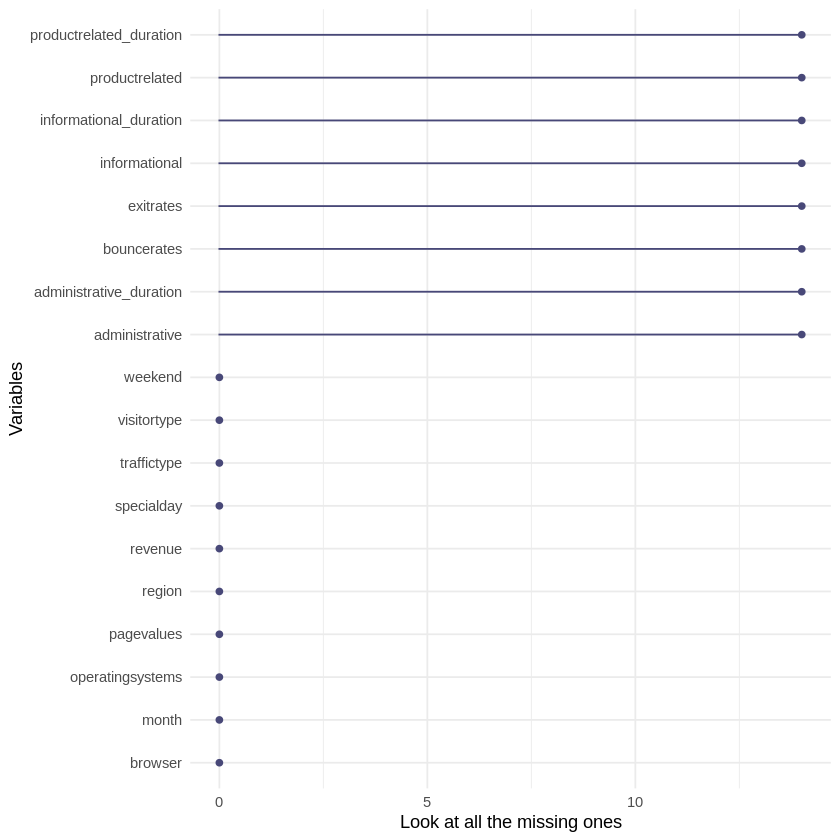

In [13]:
#Using visualizations to see missing data 
install.packages("naniar")    
library(naniar)

gg_miss_var(shoppers) + labs(y = "Look at all the missing ones")

**Dealing with missing values** 

In [14]:
#Omit missing values 
shoppers <- na.omit(shoppers)


In [15]:
# Checking the number of missing per column/variable again 
colSums(is.na(shoppers)) 

administrative administrative_duration           informational 
                      0                       0                       0 
 informational_duration          productrelated productrelated_duration 
                      0                       0                       0 
            bouncerates               exitrates              pagevalues 
                      0                       0                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

In [16]:
#Checking for duplicates in data 

duplicated_rows <- shoppers[duplicated(shoppers),]
duplicated_rows

administrative administrative_duration informational informational_duration
1   0              0                       0             0                     
2   0              0                       0             0                     
3   0              0                       0             0                     
4   0              0                       0             0                     
5   0              0                       0             0                     
6   0              0                       0             0                     
7   0              0                       0             0                     
8   0              0                       0             0                     
9   0              0                       0             0                     
10  0              0                       0             0                     
11  0              0                       0             0                     
12  0              0                       0             0                     
13  0              0                       0             0                     
14  0              0                       0             0                     
15  0              0                       0             0                     
16  0              0                       0             0                     
17  0              0                       0             0                     
18  0              0                       0             0                     
19  0              0                       0             0                     
20  0              0                       0             0                     
21  0              0                       0             0                     
22  0              0                       0             0                     
23  0              0                       0             0                     
24  0              0                       0             0                     
25  0              0                       0             0                     
26  0              0                       0             0                     
27  0              0                       0             0                     
28  0              0                       0             0                     
29  0              0                       0             0                     
30  0              0                       0             0                     
⋮   ⋮              ⋮                       ⋮             ⋮                     
88  0              0                       0             0                     
89  0              0                       0             0                     
90  0              0                       0             0                     
91  0              0                       0             0                     
92  0              0                       0             0                     
93  0              0                       0             0                     
94  0              0                       0             0                     
95  0              0                       0             0                     
96  0              0                       0             0                     
97  0              0                       0             0                     
98  0              0                       0             0                     
99  0              0                       0             0                     
100 0              0                       0             0                     
101 0              0                       0             0                     
102 0              0                       0             0                     
103 0              0                       0             0                     
104 0              0                       0             0                     
105 0              0                       0             0                     
106 

In [17]:
#Dealing with duplicates 
shoppers<- shoppers[!duplicated(shoppers), ]



In [18]:
duplicated_rows <- shoppers[duplicated(shoppers),]
duplicated_rows
dim(shoppers)

administrative administrative_duration informational
     informational_duration productrelated productrelated_duration bouncerates
     exitrates pagevalues specialday month operatingsystems browser region
     traffictype visitortype weekend revenue

[1] 12199    18

**Checking for outliers**

In [19]:

# Creating a Subset  
df <-subset(shoppers, select = -c(month, visitortype, weekend, revenue)) 
print("Modified Data Frame")  
head(df)


[1] "Modified Data Frame"


administrative administrative_duration informational informational_duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  productrelated productrelated_duration bouncerates exitrates pagevalues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  specialday operatingsystems browser region traffictype
1 0          1                1       1      1          
2 0          2                2       1      2          
3 0          4                1       9      3          
4 0          3                2       2      4          
5 0          3                3       1      4          
6 0          2                2       1      3

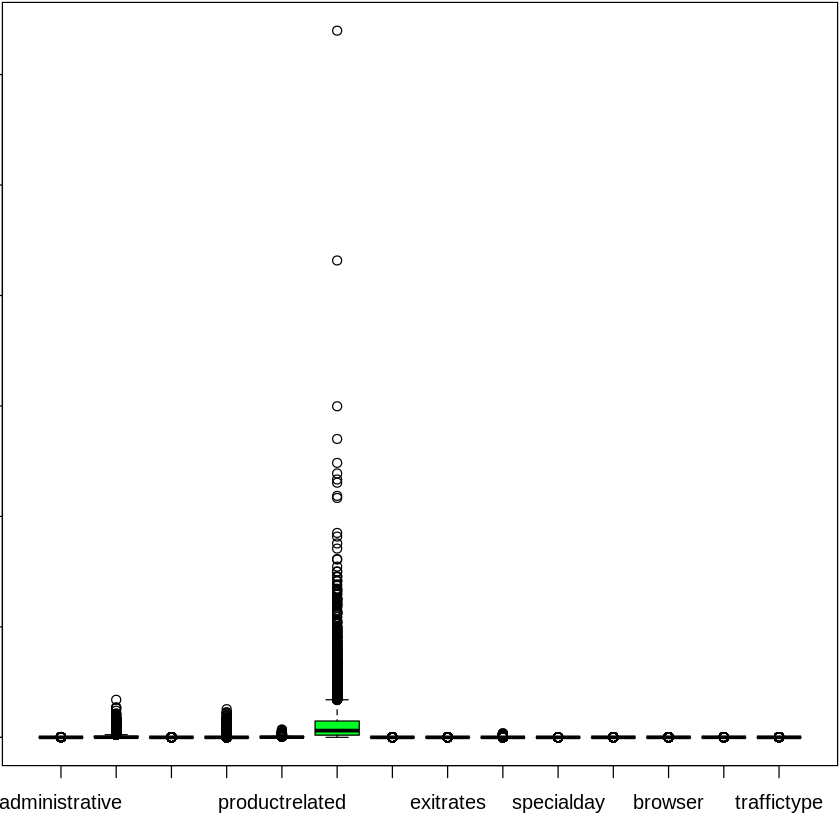

In [20]:
#Visualize the outliers 

# Margins area
par(oma=c(3,0,0,0)) # all sides have 3 lines of space
par(mar=c(0,0,0,0) + 0.1)

fig <- boxplot(df, col = rainbow(ncol(df)))


In [21]:
# Listing the outliers 
OutVals = boxplot(df, plot=FALSE, col = ncol(df))$out
OutVals

[1]  1.200000e+01  1.600000e+01  1.300000e+01  1.100000e+01  1.300000e+01
    [6]  1.800000e+01  1.400000e+01  1.200000e+01  1.200000e+01  1.600000e+01
   [11]  1.300000e+01  1.700000e+01  1.900000e+01  1.500000e+01  1.100000e+01
   [16]  1.100000e+01  1.200000e+01  1.300000e+01  1.100000e+01  1.400000e+01
   [21]  1.100000e+01  1.500000e+01  1.100000e+01  1.100000e+01  1.100000e+01
   [26]  1.200000e+01  1.100000e+01  2.400000e+01  1.100000e+01  1.100000e+01
   [31]  1.400000e+01  1.400000e+01  1.200000e+01  1.300000e+01  1.200000e+01
   [36]  1.300000e+01  1.300000e+01  1.300000e+01  1.500000e+01  1.200000e+01
   [41]  1.500000e+01  1.100000e+01  1.100000e+01  1.400000e+01  1.100000e+01
   [46]  1.200000e+01  1.900000e+01  2.400000e+01  1.200000e+01  1.200000e+01
   [51]  1.400000e+01  1.200000e+01  1.100000e+01  1.400000e+01  1.100000e+01
   [56]  1.400000e+01  1.200000e+01  1.300000e+01  1.100000e+01  1.200000e+01
   [61]  1.700000e+01  1.600000e+01  1.500000e+01  1.100000e+01  1.200000e+01
   [66]  1.100000e+01  1.500000e+01  1.200000e+01  1.100000e+01  1.400000e+01
   [71]  1.600000e+01  1.200000e+01  1.100000e+01  1.200000e+01  1.400000e+01
   [76]  1.300000e+01  1.500000e+01  1.100000e+01  1.300000e+01  1.100000e+01
   [81]  1.100000e+01  1.700000e+01  1.500000e+01  1.500000e+01  1.400000e+01
   [86]  1.600000e+01  1.300000e+01  2.200000e+01  1.300000e+01  1.500000e+01
   [91]  1.200000e+01  1.100000e+01  1.100000e+01  1.600000e+01  1.300000e+01
   [96]  1.200000e+01  1.200000e+01  1.100000e+01  2.400000e+01  1.300000e+01
  [101]  1.800000e+01  1.200000e+01  1.200000e+01  1.700000e+01  1.500000e+01
  [106]  1.100000e+01  1.700000e+01  1.300000e+01  1.600000e+01  1.300000e+01
  [111]  1.800000e+01  1.700000e+01  1.100000e+01  2.400000e+01  1.200000e+01
  [116]  1.100000e+01  1.500000e+01  1.200000e+01  1.600000e+01  1.100000e+01
  [121]  1.100000e+01  1.100000e+01  1.200000e+01  1.400000e+01  1.200000e+01
  [126]  1.500000e+01  1.100000e+01  1.200000e+01  1.300000e+01  1.200000e+01
  [131]  1.100000e+01  1.400000e+01  1.500000e+01  1.100000e+01  1.200000e+01
  [136]  1.200000e+01  1.400000e+01  1.600000e+01  1.100000e+01  1.200000e+01
  [141]  1.500000e+01  1.100000e+01  2.100000e+01  1.100000e+01  1.100000e+01
  [146]  1.100000e+01  1.100000e+01  1.300000e+01  1.500000e+01  1.100000e+01
  [151]  1.400000e+01  1.400000e+01  1.500000e+01  1.300000e+01  1.400000e+01
  [156]  1.800000e+01  1.600000e+01  1.500000e+01  1.300000e+01  1.900000e+01
  [161]  2.000000e+01  1.200000e+01  1.800000e+01  1.200000e+01  1.200000e+01
  [166]  1.200000e+01  1.300000e+01  1.300000e+01  1.400000e+01  1.300000e+01
  [171]  1.900000e+01  1.100000e+01  1.100000e+01  1.100000e+01  1.100000e+01
  [176]  1.400000e+01  1.100000e+01  1.100000e+01  1.400000e+01  1.700000e+01
  [181]  1.100000e+01  1.400000e+01  1.300000e+01  1.300000e+01  1.600000e+01
  [186]  1.300000e+01  1.300000e+01  1.300000e+01  1.100000e+01  1.100000e+01
  [191]  1.100000e+01  1.600000e+01  1.500000e+01  1.200000e+01  1.500000e+01
  [196]  1.200000e+01  1.100000e+01  1.800000e+01  1.300000e+01  1.400000e+01
  [201]  1.300000e+01  1.100000e+01  1.500000e+01  1.500000e+01  1.100000e+01
  [206]  1.300000e+01  1.600000e+01  1.200000e+01  1.400000e+01  1.400000e+01
  [211]  1.100000e+01  1.500000e+01  1.900000e+01  1.100000e+01  1.400000e+01
  [216]  2.300000e+01  1.600000e+01  1.400000e+01  1.500000e+01  1.600000e+01
  [221]  1.400000e+01  1.100000e+01  1.400000e+01  1.100000e+01  1.300000e+01
  [226]  1.500000e+01  2.300000e+01  1.300000e+01  1.100000e+01  1.200000e+01
  [231]  1.100000e+01  1.100000e+01  1.200000e+01  1.200000e+01  1.700000e+01
  [236]  1.200000e+01  1.100000e+01  1.200000e+01  1.500000e+01  1.200000e+01
  [241]  1.100000e+01  1.100000e+01  1.100000e+01  1.100000e+01  2.700000e+01
  [246]  2.200000e+01  1.800000e+01  1.200000e+01  1.400000e+01  1.200000e+01
  [251]  1.300000e+01  1.200000e+01  1.200000e+01  1.200000e+01  1.300000e+01
  [256]  1.100000e+01  1.2

In [22]:
#Removing outliers from each column 

shoppers1 = shoppers
shoppers1<- shoppers[-which(shoppers$administrative %in% OutVals ),]
shoppers1<- shoppers[-which(shoppers$administrative_duration %in% OutVals ),]
shoppers1<- shoppers[-which(shoppers$informational%in% OutVals ),]
shoppers1<- shoppers[-which(shoppers$informational_duration %in% OutVals ),]
shoppers1<- shoppers[-which(shoppers$productrelated %in% OutVals ),]
shoppers1<- shoppers[-which(shoppers$productrelated_duration %in% OutVals),]


In [23]:
#check the difference after removing outliers 
print(dim(shoppers))
print(dim(shoppers1))

[1] 12199    18
[1] 8956   18


#**Perform Exploratory Data Analysis**

##**Univariate**

In [24]:

# Creating a Subset  
df1 <-subset(shoppers1, select = -c(month, visitortype, weekend, revenue)) 
print("Modified Data Frame")  
head(df1)

[1] "Modified Data Frame"


administrative administrative_duration informational informational_duration
1 0               0                      0             0                     
2 0               0                      0             0                     
3 0               0                      0             0                     
4 0               0                      0             0                     
5 0               0                      0             0                     
6 2              53                      0             0                     
  productrelated productrelated_duration bouncerates exitrates  pagevalues
1  1                0.000000             0.200000000 0.20000000 0         
2  2                2.666667             0.050000000 0.14000000 0         
3 10              627.500000             0.020000000 0.05000000 0         
4 19              154.216667             0.015789474 0.02456140 0         
5 16              407.750000             0.018750000 0.02583333 0         
6 23             1668.285119             0.008333333 0.01631264 0         
  specialday operatingsystems browser region traffictype
1 0.0        1                1       1      1          
2 0.0        3                2       2      4          
3 0.0        3                3       1      4          
4 0.0        2                2       1      3          
5 0.4        1                1       4      3          
6 0.0        1                1       9      3

In [25]:
#Descriptive statistics for each column 

desc_stats <- data.frame(
  Min = apply(df1, 2, min),    # minimum
  Max = apply(df1, 2, max),     # Maximum
  Med = apply(df1, 2, median), # median
  Mean = apply(df1, 2, mean),  # mean
  variance= apply(df1, 2, var),  #Variance 
  SD = apply(df1, 2, sd)   # Standard deviation
  )   


In [26]:
desc_stats <- round(desc_stats, 1)
desc_stats

Min Max    Med   Mean  variance SD   
administrative          0     24.0   1.0   2.4     10.1   3.2
administrative_duration 0   2156.2  18.0  82.4  27089.0 164.6
informational           0     16.0   0.0   0.5      1.4   1.2
informational_duration  0   2252.0   0.0  30.4  15301.2 123.7
productrelated          0    223.0  21.0  27.6    589.3  24.3
productrelated_duration 0   3401.3 735.9 961.0 663437.4 814.5
bouncerates             0      0.2   0.0   0.0      0.0   0.0
exitrates               0      0.2   0.0   0.0      0.0   0.0
pagevalues              0    361.8   0.0   6.9    407.4  20.2
specialday              0      1.0   0.0   0.1      0.0   0.2
operatingsystems        1      8.0   2.0   2.1      0.9   0.9
browser                 1     13.0   2.0   2.3      2.9   1.7
region                  1      9.0   3.0   3.2      5.8   2.4
traffictype             1     20.0   2.0   4.1     16.1   4.0

Mode 

In [27]:
#Get the mode 

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


attach(shoppers1)
 print("The mode of the administrative column is " )
getmode(administrative);

 print("The mode of the administrative_duration column is " )
 getmode(administrative_duration); 

print("The mode of the informational column is " )
getmode(informational);

  print("The mode of the informational_duration column is " )
 getmode(informational_duration);

print("The mode of the productrelated column is " )
 getmode(productrelated);

print("The mode of the productrelated_duration column is " )
 getmode(productrelated_duration);

print("The mode of the bouncerates column is " )
 getmode(bouncerates);
 

 print("The mode of the exitrates column is " )
  getmode(exitrates);
  
 print("The mode of the pagevalues column is " ) 
  getmode(pagevalues)

   print("The mode of the specialday column is " ) 
  getmode(specialday)

 print("The mode of the operatingsystems column is " ) 
  getmode(operatingsystems)

 print("The mode of the browser column is " ) 
  getmode(browser)

 print("The mode of the region column is " ) 
  getmode(region)

 print("The mode of the traffictype column is " ) 
  getmode(traffictype)

[1] "The mode of the administrative column is "


[1] 0

[1] "The mode of the administrative_duration column is "


[1] 0

[1] "The mode of the informational column is "


[1] 0

[1] "The mode of the informational_duration column is "


[1] 0

[1] "The mode of the productrelated column is "


[1] 1

[1] "The mode of the productrelated_duration column is "


[1] 0

[1] "The mode of the bouncerates column is "


[1] 0

[1] "The mode of the exitrates column is "


[1] 0.2

[1] "The mode of the pagevalues column is "


[1] 0

[1] "The mode of the specialday column is "


[1] 0

[1] "The mode of the operatingsystems column is "


[1] 2

[1] "The mode of the browser column is "


[1] 2

[1] "The mode of the region column is "


[1] 1

[1] "The mode of the traffictype column is "


[1] 2

In [28]:
#check the quantiles  values of every column 
 Quantiles = apply(df1, 2, quantile)     # Quantile
Quantiles

administrative administrative_duration informational
0%    0                0.000                 0           
25%   0                0.000                 0           
50%   1               18.000                 0           
75%   4              100.150                 0           
100% 24             2156.167                16           
     informational_duration productrelated productrelated_duration bouncerates
0%      0.000                 0               0.0000               0.000000000
25%     0.000                11             318.6958               0.000000000
50%     0.000                21             735.9083               0.003846154
75%     0.000                37            1414.7888               0.016666667
100% 2252.033               223            3401.3000               0.200000000
     exitrates  pagevalues specialday operatingsystems browser region
0%   0.00000000   0.0000   0          1                 1      1     
25%  0.01250000   0.0000   0          2                 2      1     
50%  0.02307692   0.0000   0          2                 2      3     
75%  0.04060606   0.0000   0          3                 2      4     
100% 0.20000000 361.7637   1          8                13      9     
     traffictype
0%    1         
25%   2         
50%   2         
75%   4         
100% 20

In [29]:
#check the range of  values of every column 
Range = apply(df1, 2, range)    # Range
Range

administrative administrative_duration informational
[1,]  0                0.000                 0           
[2,] 24             2156.167                16           
     informational_duration productrelated productrelated_duration bouncerates
[1,]    0.000                 0               0.0                  0.0        
[2,] 2252.033               223            3401.3                  0.2        
     exitrates pagevalues specialday operatingsystems browser region
[1,] 0.0         0.0000   0          1                 1      1     
[2,] 0.2       361.7637   1          8                13      9     
     traffictype
[1,]  1         
[2,] 20

Administatrive 

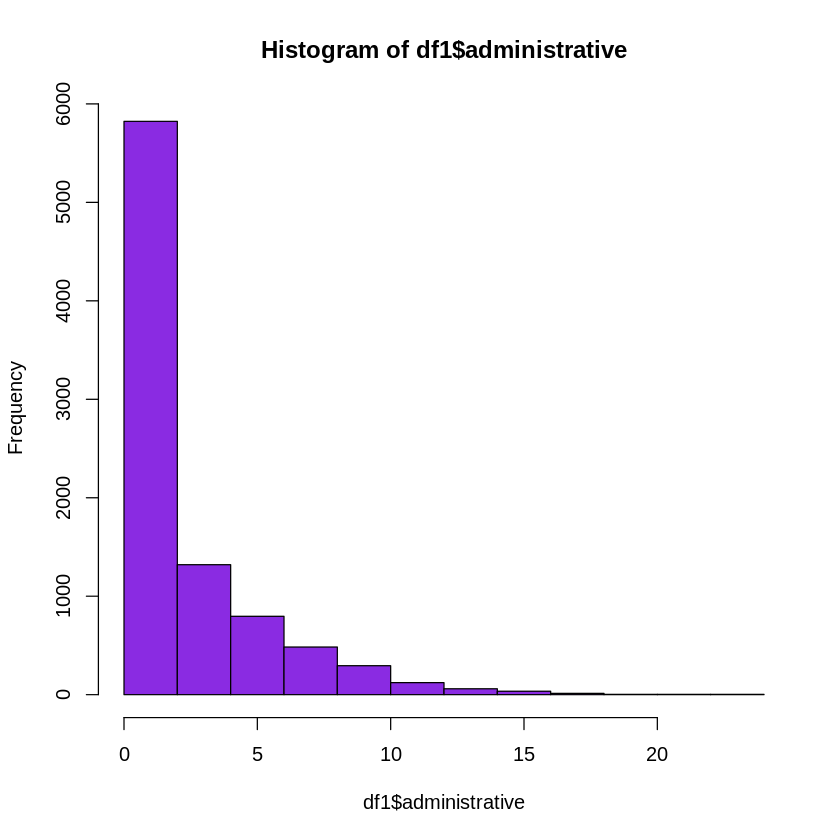

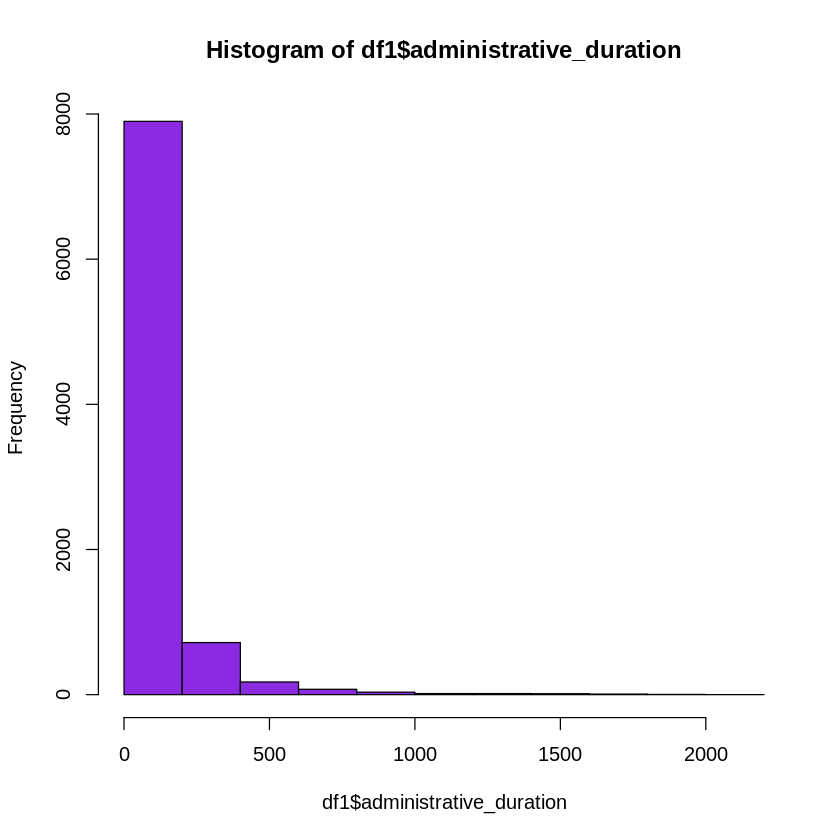

In [30]:
#See the administrative distribution 
hist(df1$administrative, col='blueviolet')
#See the administrative_duration distribution 
hist(df1$administrative_duration, col='blueviolet')


Informational 

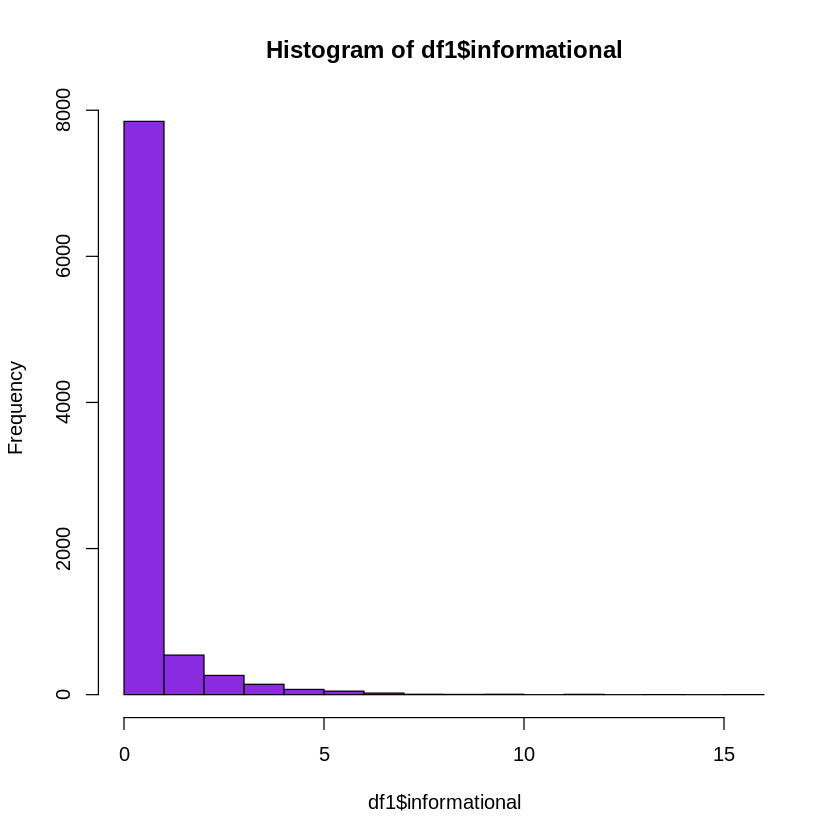

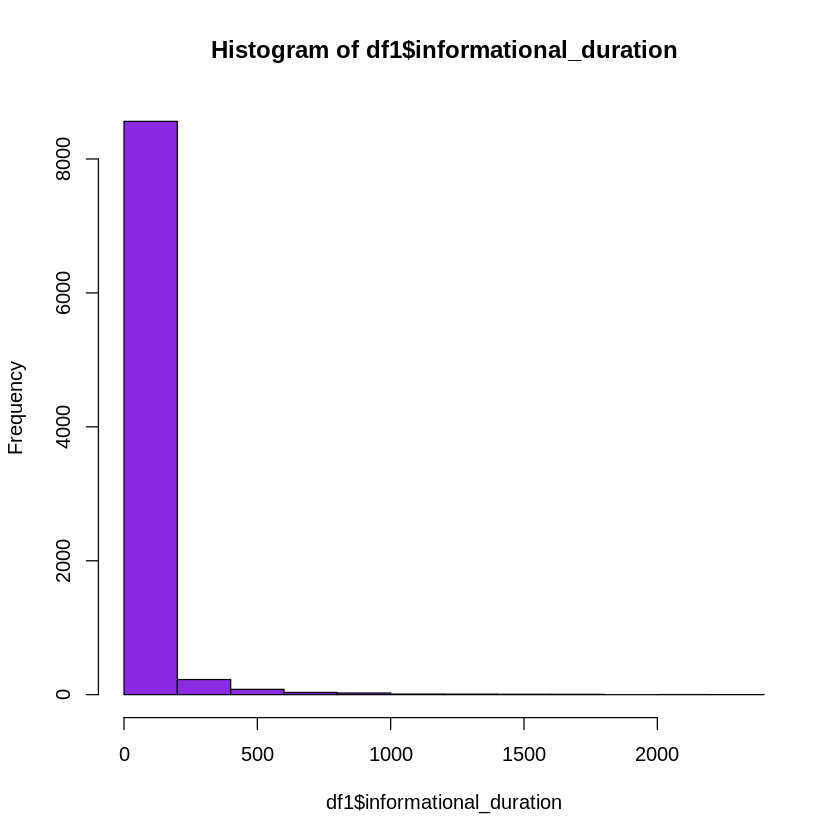

In [31]:

hist(df1$informational, col='blueviolet')  #See the informational distribution 
#See the informational_duration distribution 
hist(df1$informational_duration, col='blueviolet')

Product related 

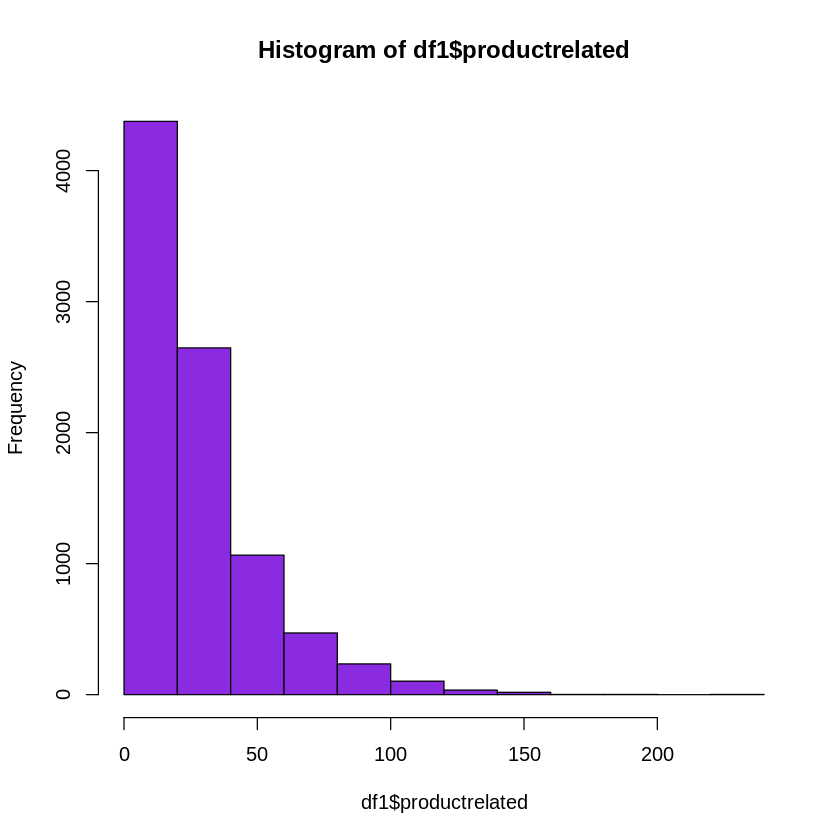

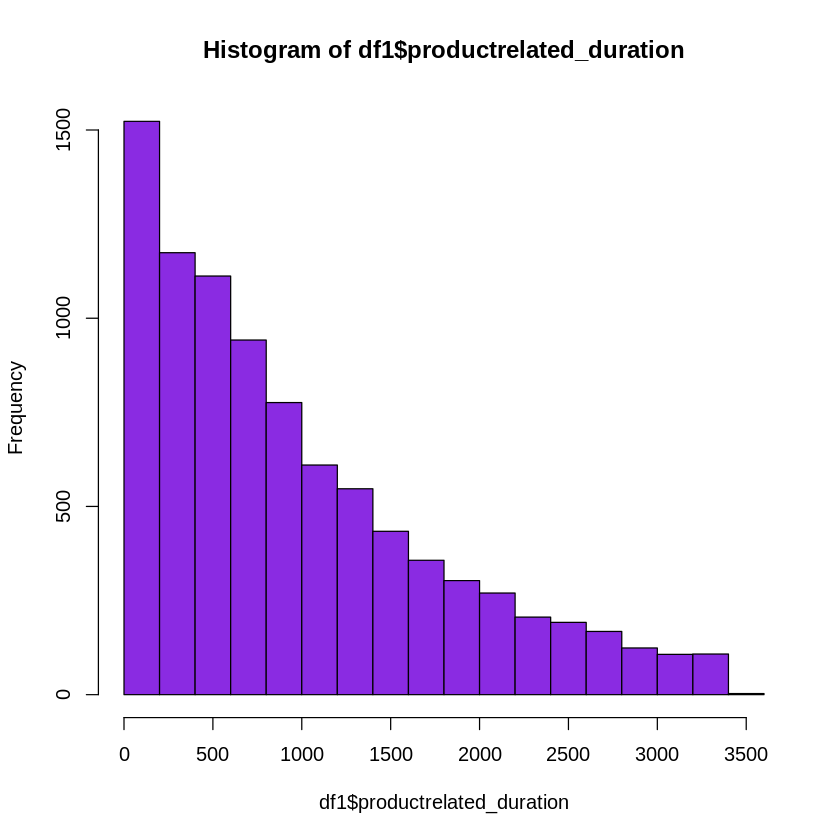

In [32]:
hist(df1$productrelated, col='blueviolet') #See the productrelated distribution 

hist(df1$productrelated_duration, col='blueviolet')  #See the productrelated_duration distribution


Bouncerates 

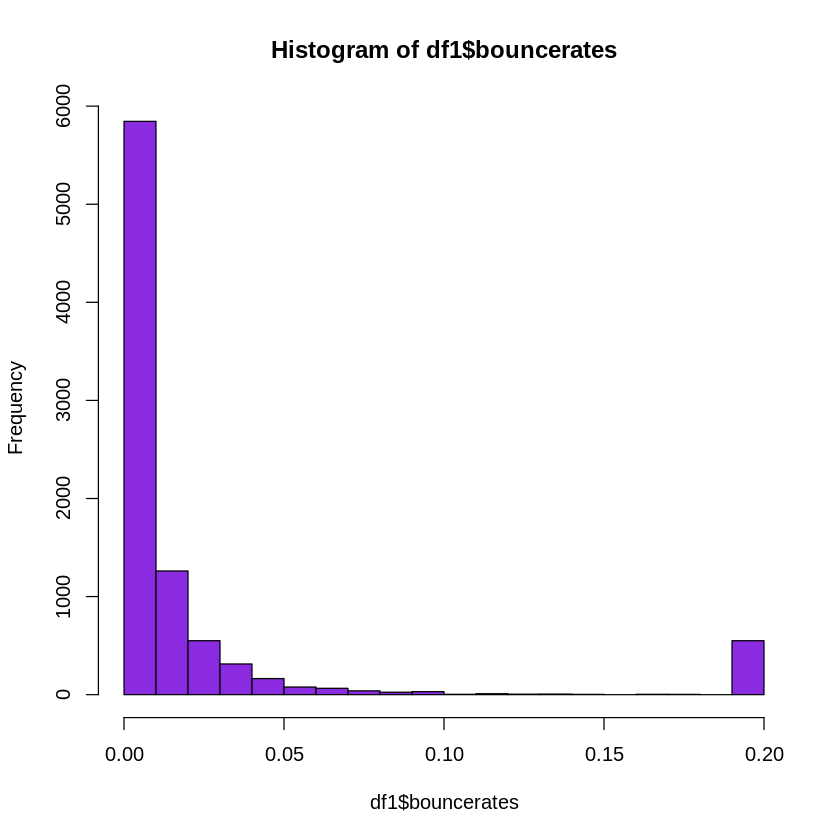

In [33]:
hist(df1$bouncerates, col='blueviolet')

Exitrates 

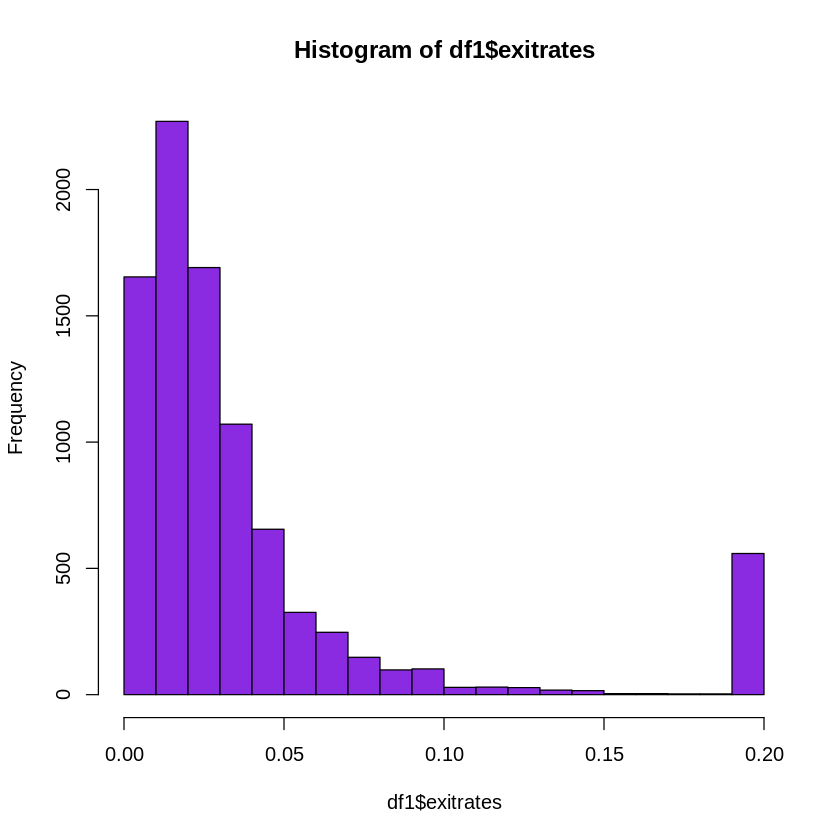

In [34]:
hist(df1$exitrates, col='blueviolet')

page-values 

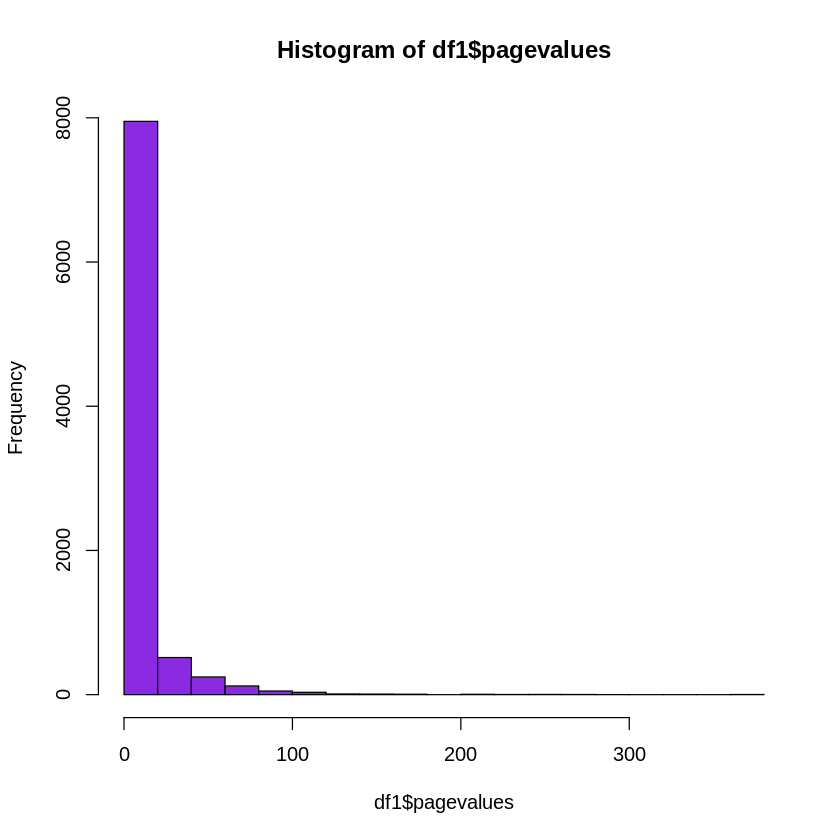

In [35]:
hist(df1$pagevalues, col='blueviolet')

Special day 

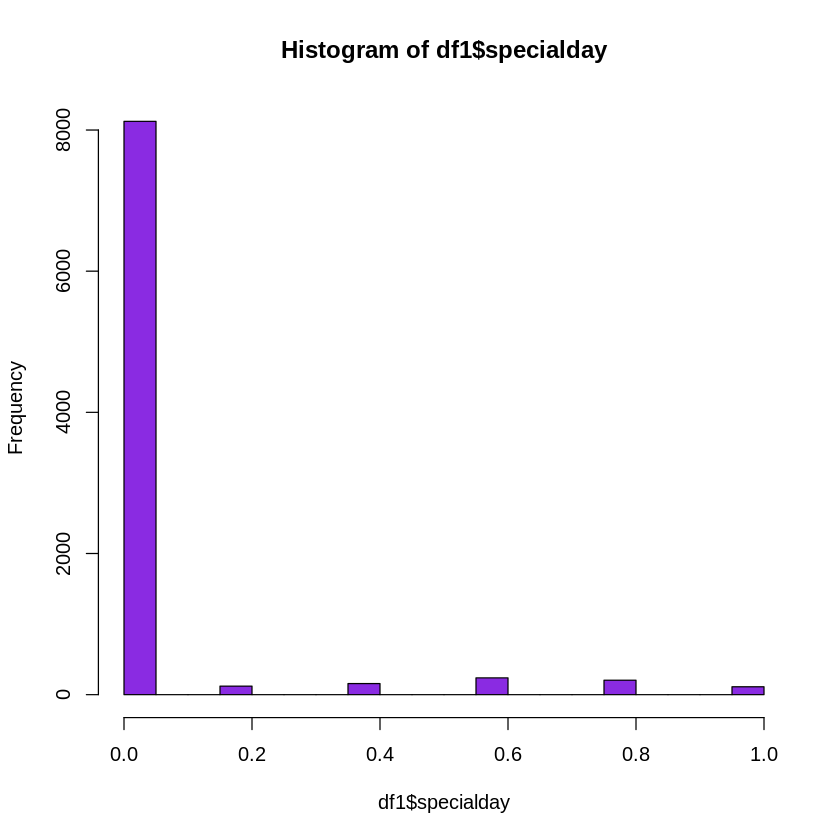

In [36]:
#See the daily_time_spent_on_site distribution 
hist(df1$specialday, col='blueviolet')

Computers 

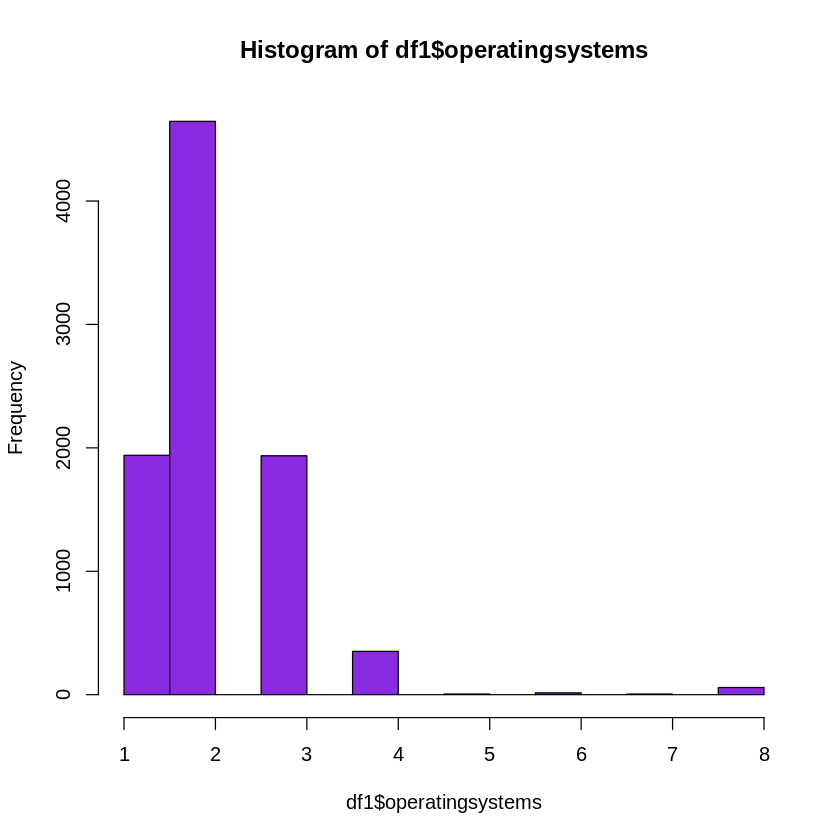

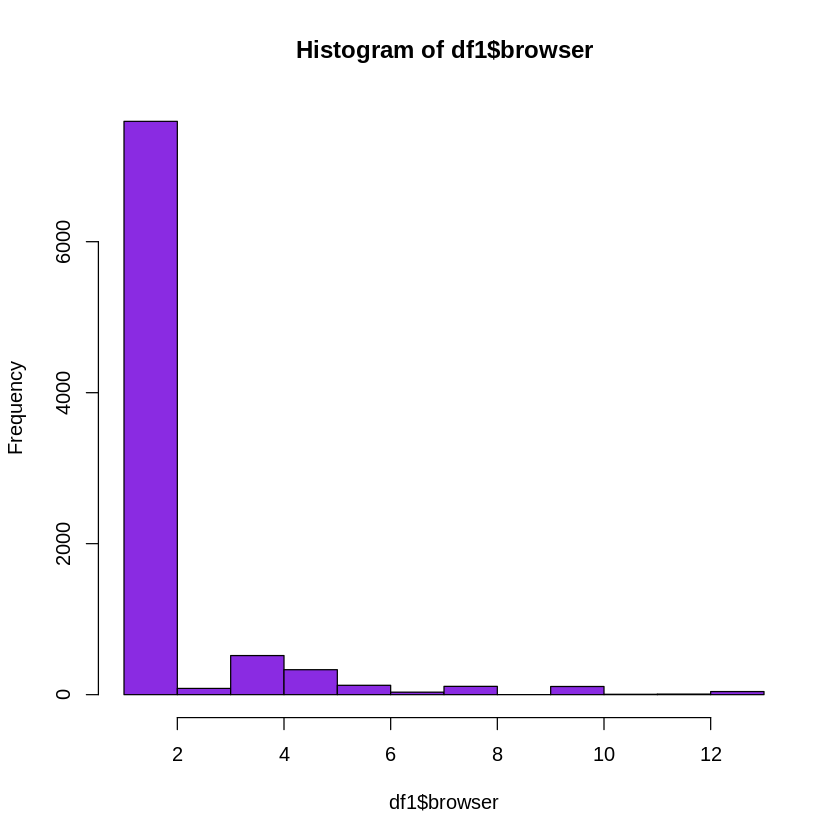

In [37]:
#See the operatingsystems distribution 
hist(df1$operatingsystems, col='blueviolet')
#See the browser distribution 
hist(df1$browser, col='blueviolet')

Traffic type 

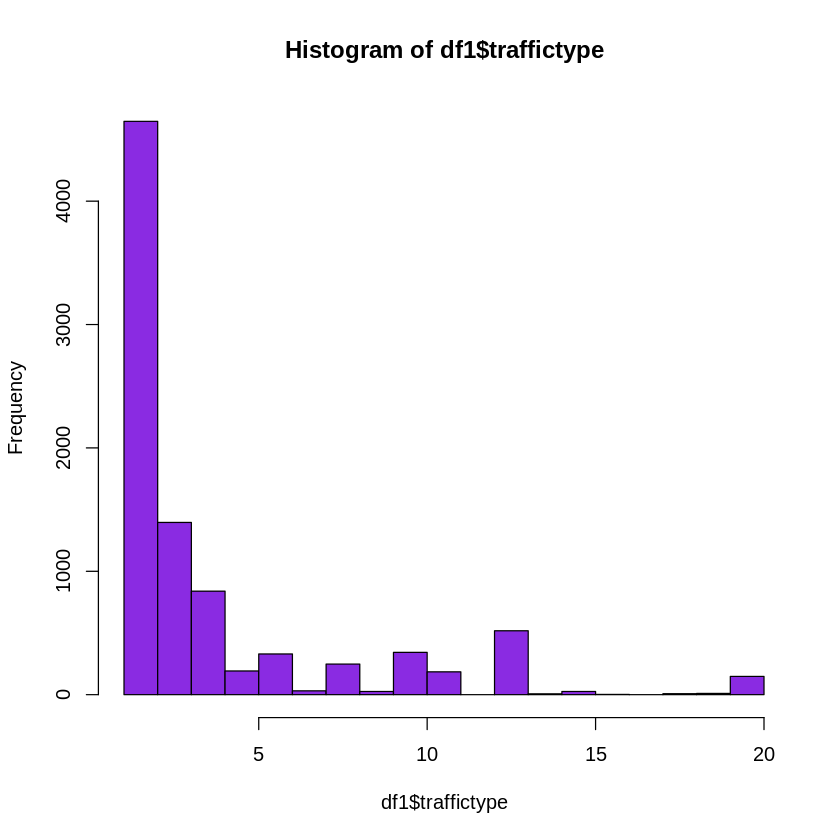

In [38]:
#See the traffictype distribution 
hist(df1$traffictype, col='blueviolet')

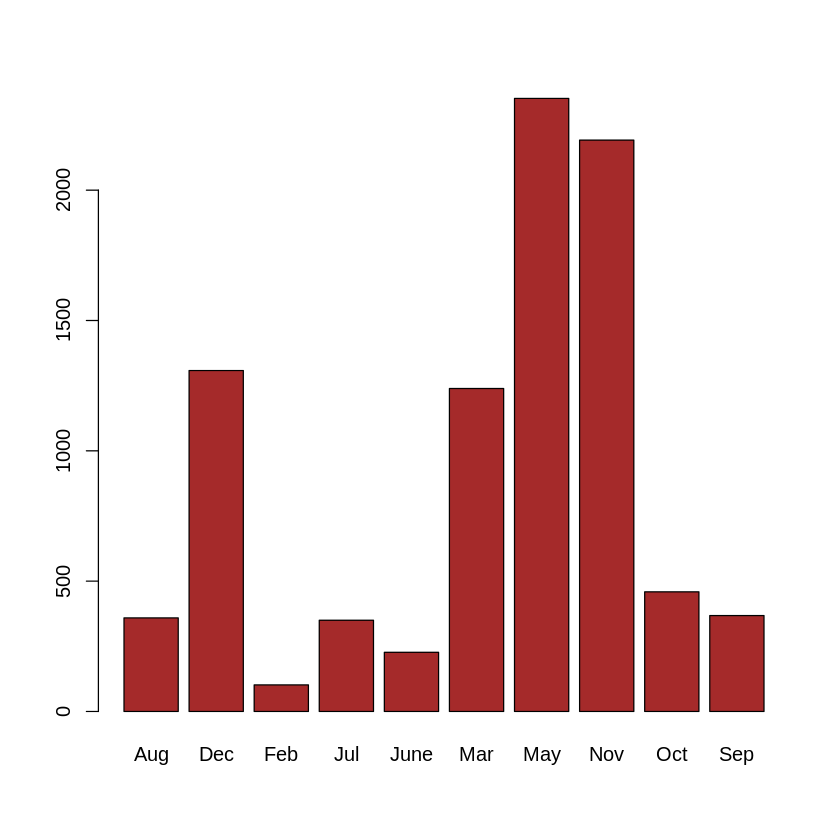

In [39]:
# Getting specific column - month
month1 <-shoppers1$month

# Applying the table() function will compute the frequency distribution of the month variable
# ---
# 
month_frequency1 <- table(month1)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(month_frequency1, col=c("brown"))

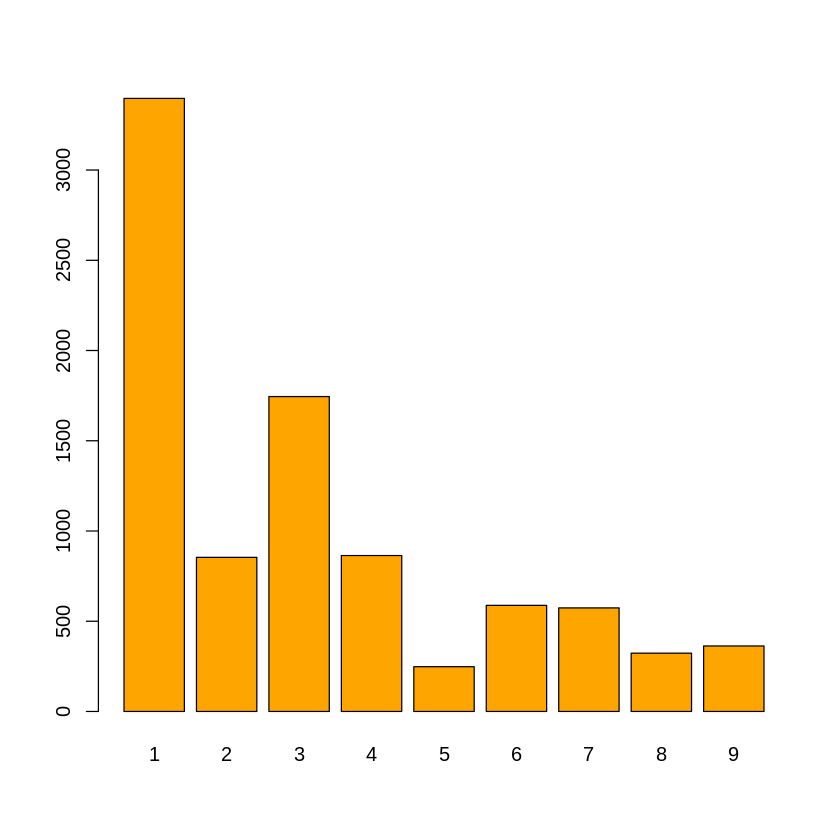

In [40]:
# Getting specific column - region
regions <-shoppers1$region

# Applying the table() function will compute the frequency distribution of the region variable
# ---
# 
regions_frequency1 <- table(regions)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(regions_frequency1, col=c("orange"))

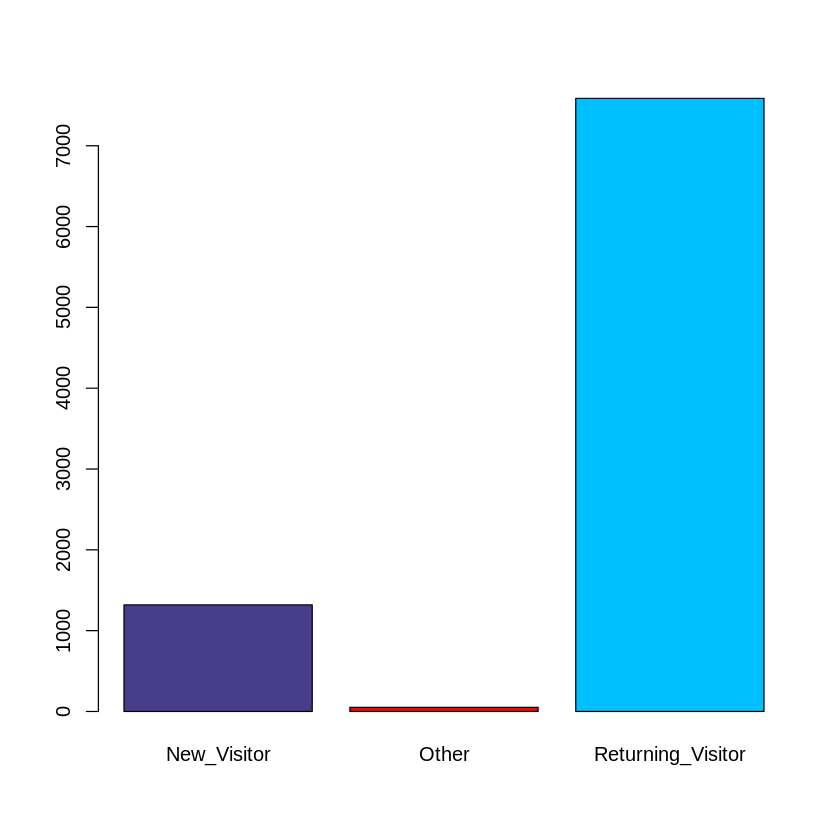

In [41]:
# Getting specific column - visitortype
visitors <-shoppers1$visitortype

# Applying the table() function will compute the frequency distribution of the visitortype variable
# ---
# 
visitors_frequency1 <- table(visitors)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(visitors_frequency1, col=c("darkslateblue", "red", "deepskyblue"))

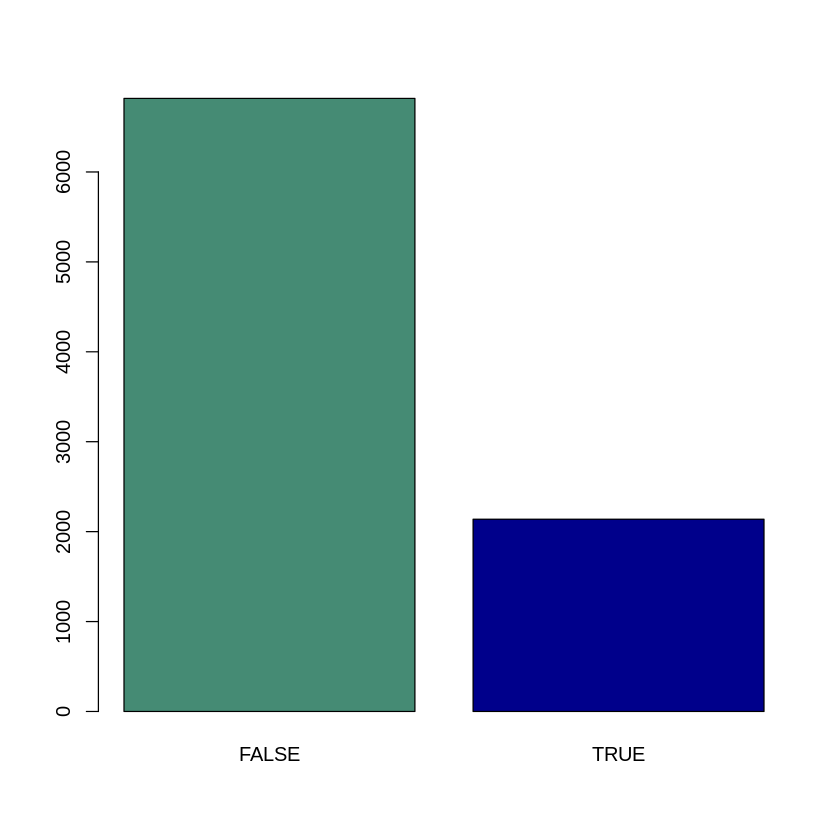

In [42]:
# Getting specific column - weekend
weekends <- shoppers1$weekend

# Applying the table() function will compute the frequency distribution of the weekend variable
# ---
# 
weekend_frequency1 <- table(weekends)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(weekend_frequency1, col=c("aquamarine4", "blue4"))

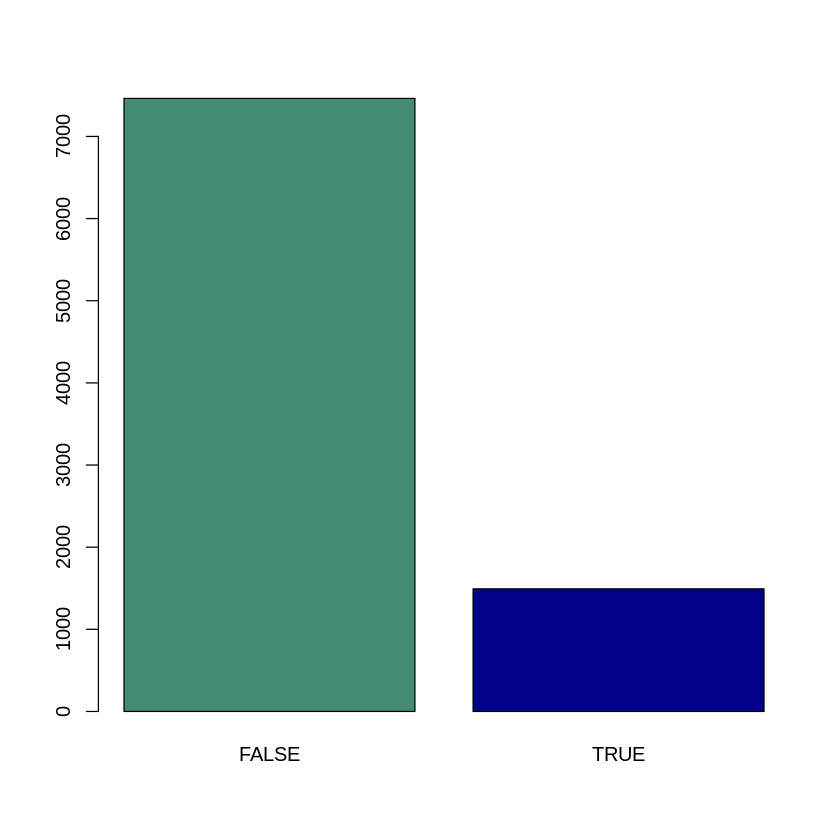

In [43]:
# Getting specific column - revenue
revenues <- shoppers1$revenue

# Applying the table() function will compute the frequency distribution of the revenue variable
# ---
# 
revenues_frequency1 <- table(revenues)


# Then applying the barplot function to produce its bar graph
# ---
# 
barplot(revenues_frequency1, col=c("aquamarine4", "blue4"))

##**Bivariate**

Revenue by day type


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




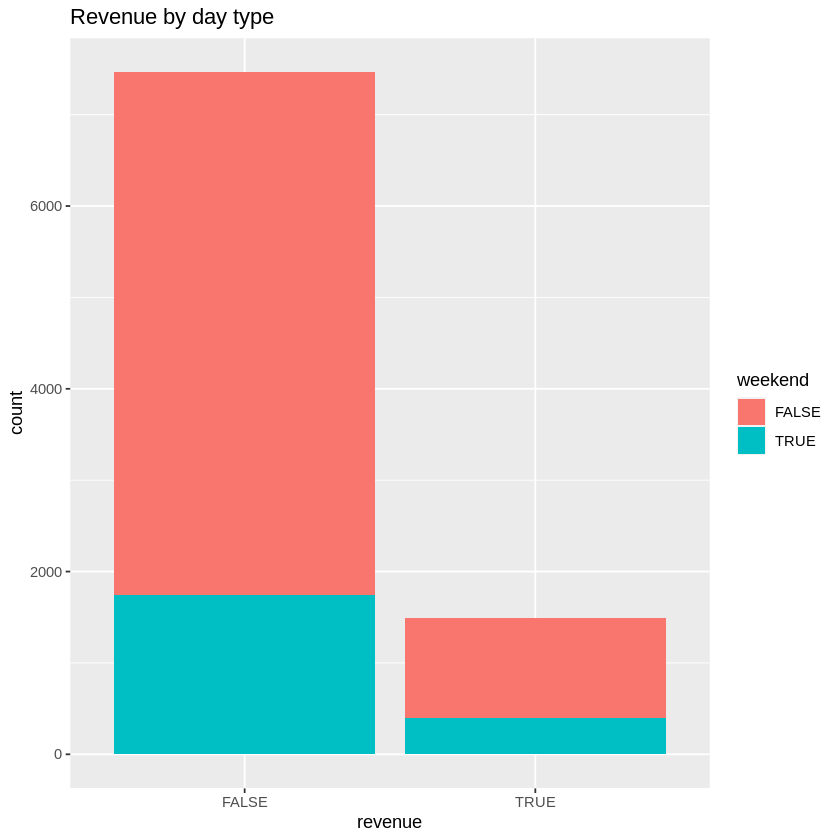

In [44]:
library(magrittr)
shoppers1 %>% 
   ggplot(aes(revenue)) +
   geom_bar(aes(fill= weekend))+
   labs(title = "Revenue by day type")
   

Revenue by month 

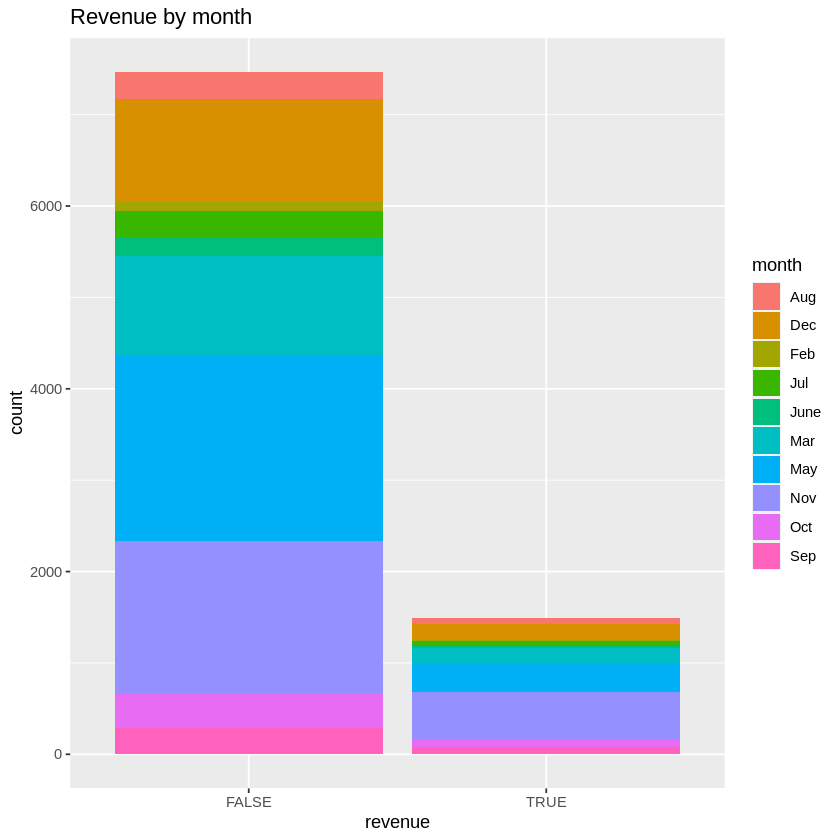

In [45]:
library(magrittr)
shoppers1 %>% 
   ggplot(aes(revenue)) +
   geom_bar(aes(fill= month))+
   labs(title = "Revenue by month")


Revenue by visitor type 

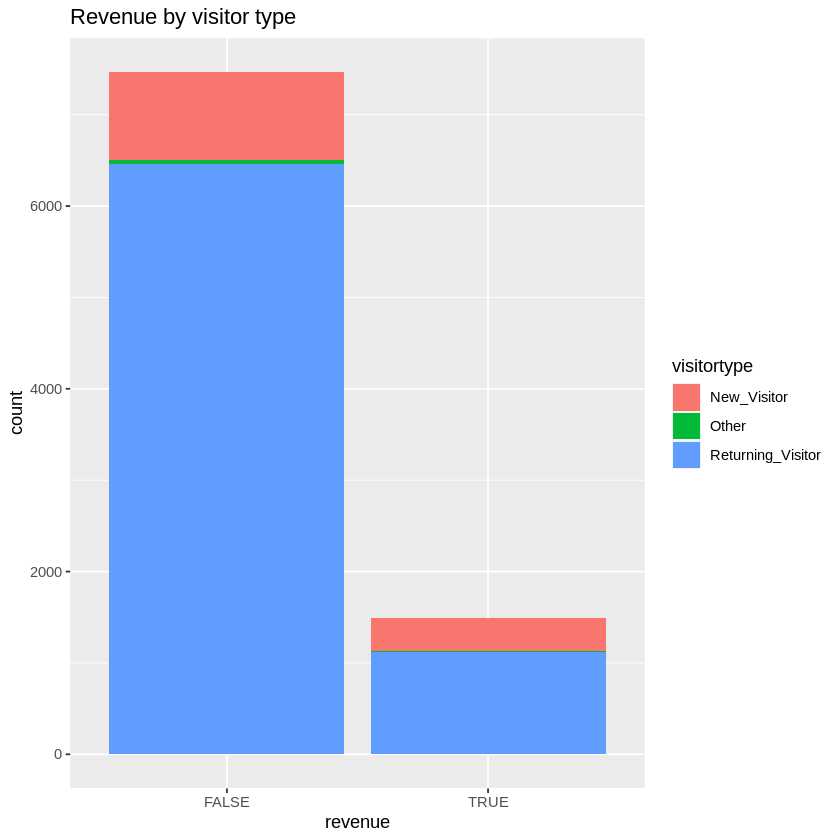

In [46]:
library(magrittr)
shoppers1 %>% 
   ggplot(aes(revenue)) +
   geom_bar(aes(fill= visitortype))+
   labs(title = "Revenue by visitor type")


 Time spent on Informational_ duration versus  administrative_duration 

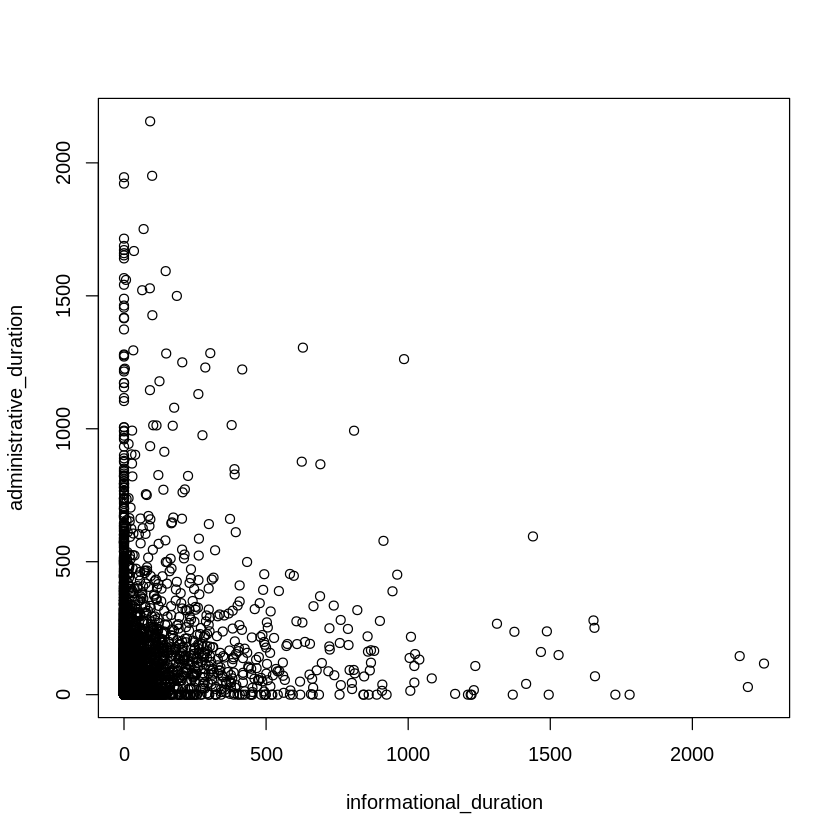

In [47]:
plot(informational_duration,administrative_duration,  xlab="informational_duration", ylab="administrative_duration") # Drawwing a scatterplot

In [48]:
cor(informational_duration,administrative_duration) #Correlation Coefficient

[1] 0.1332411

In [49]:
cov(informational_duration,administrative_duration)

[1] 2712.677

Bouncerates versus exit rates 

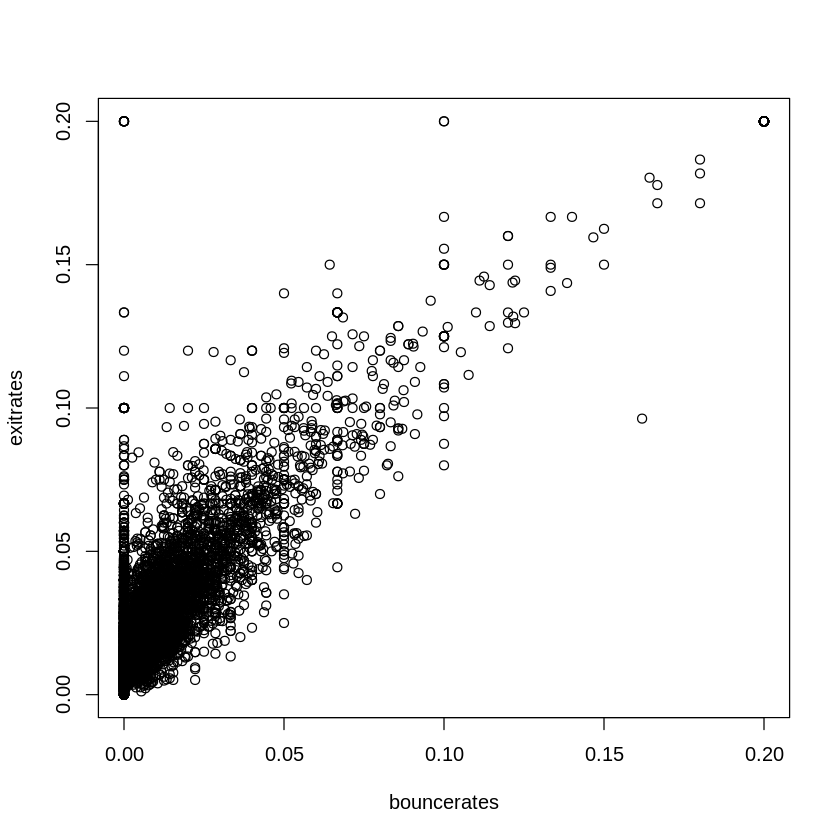

In [50]:
plot(bouncerates,exitrates,  xlab="bouncerates", ylab="exitrates") # Drawwing a scatterplot

In [51]:
cor(bouncerates,exitrates) #Correlation Coefficient

[1] 0.9479605

In [52]:
cov(bouncerates,exitrates)

[1] 0.002185605

##**Multivariate**

In [53]:
library("ggpubr")


Attaching package: ‘ggpubr’


The following object is masked from ‘package:dendextend’:

    rotate




`geom_smooth()` using formula 'y ~ x'



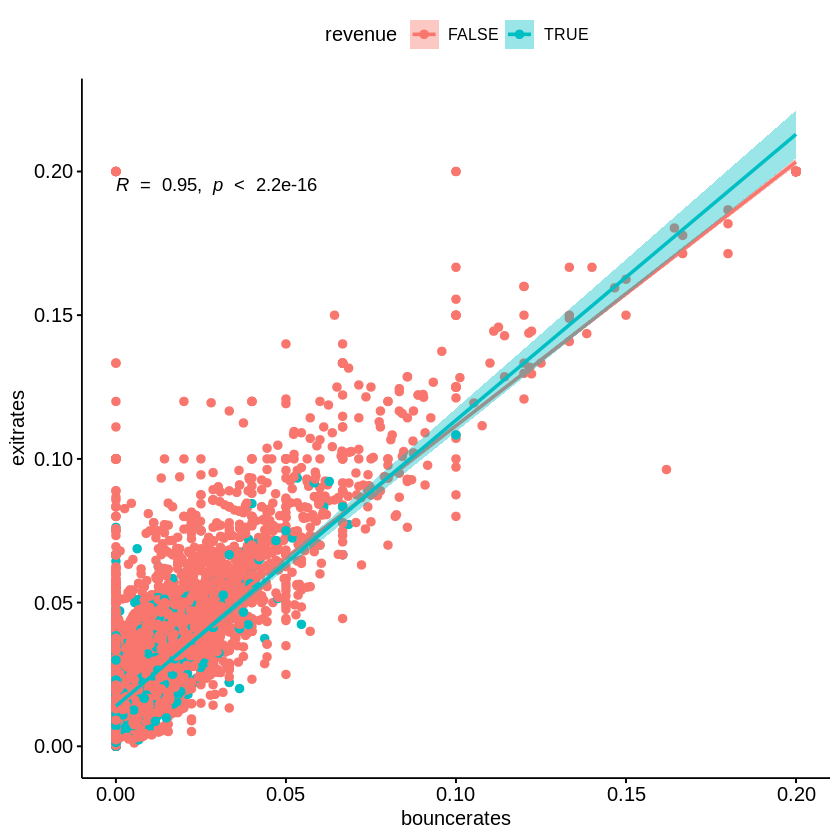

In [54]:
ggscatter(shoppers1, x = "bouncerates", y = "exitrates", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "bouncerates", ylab = "exitrates",  color = "revenue")

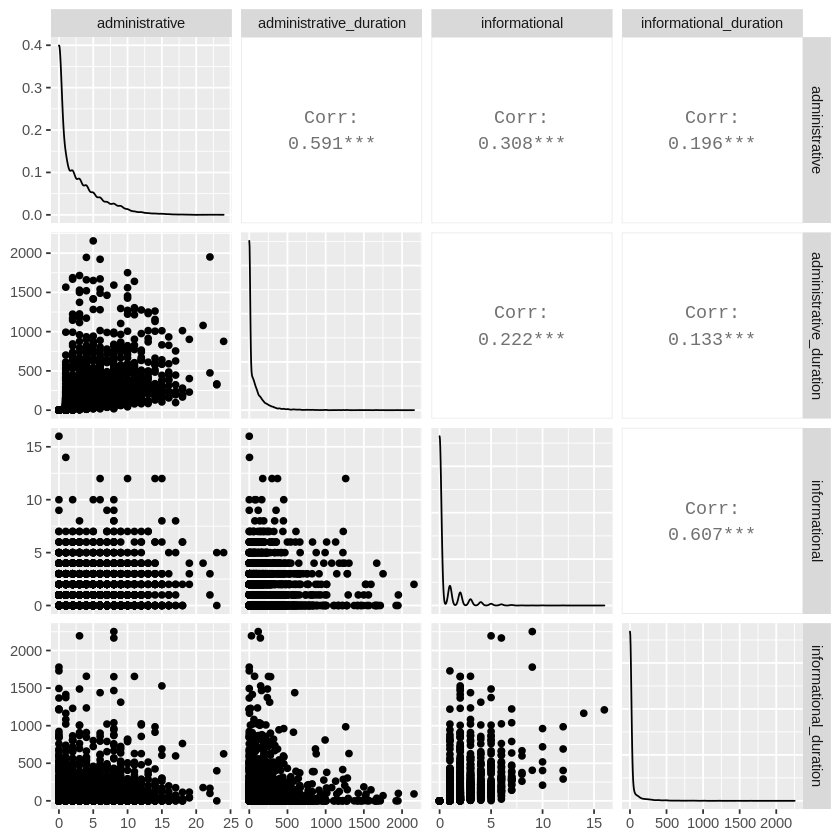

In [55]:
ggpairs(shoppers1[1:4])

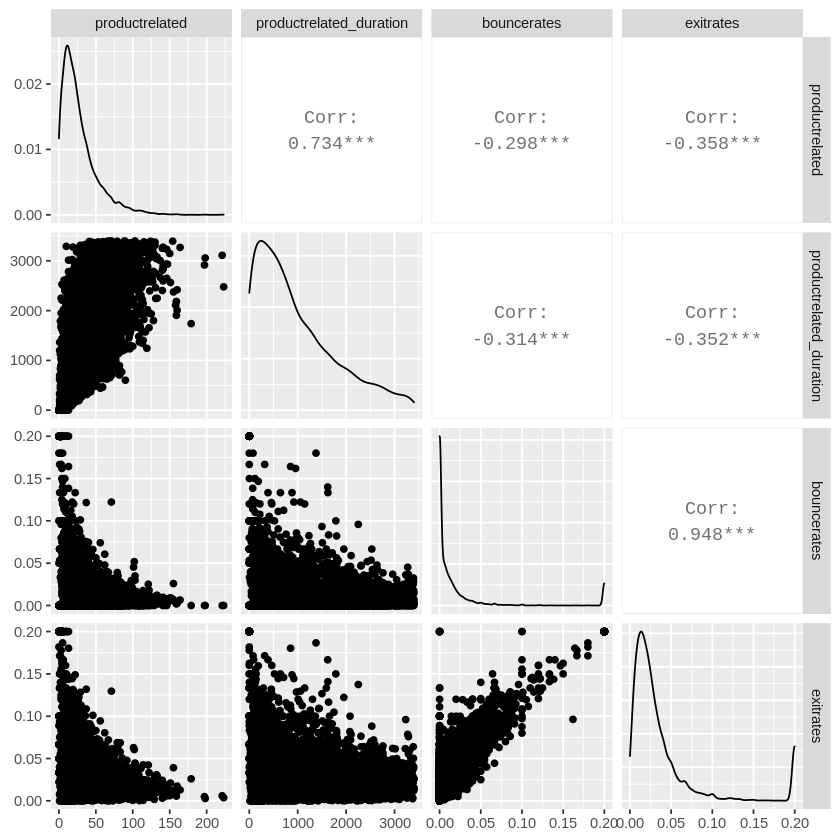

In [56]:
ggpairs(shoppers1[5:8])

corrplot 0.84 loaded



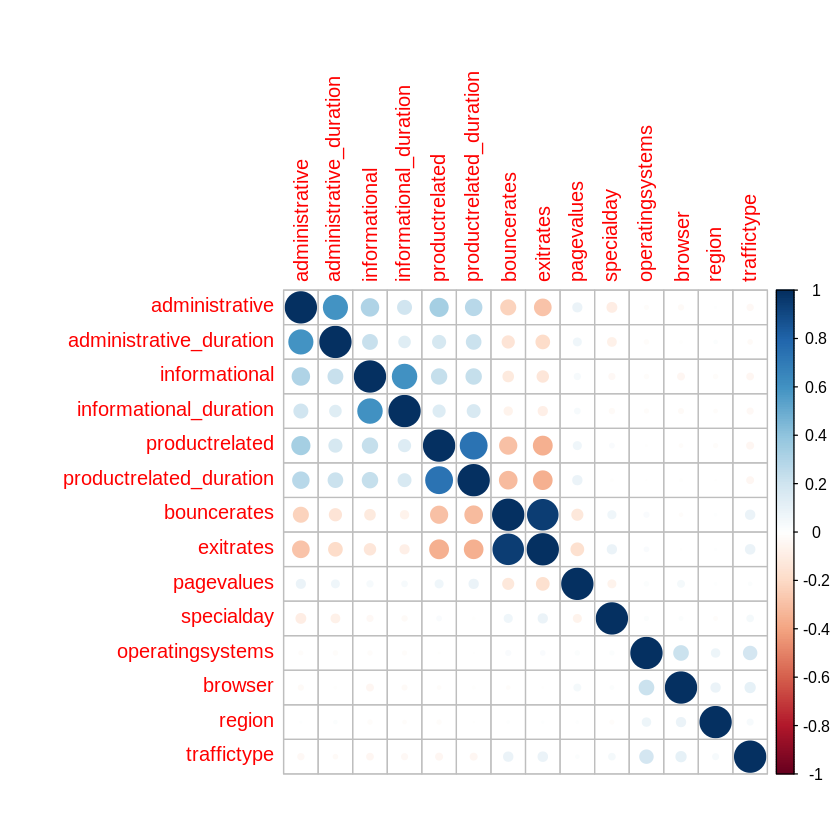

In [57]:
M<-cor(df1) #find the correlation
library(corrplot)
# Margins area
par(oma=c(0,0,0,0)) # all sides have 3 lines of space
par(mar=c(0,0,0,0) + 0.1)
corrplot(M, method="circle") #Compute and visualize the correlation co-eeficients 

#**Implement the Solution**

In [58]:
# we would not require Class Label(output) during execution of our algorithm. 
# We will, therefore, remove Class Attribute âSpeciesâ and store it in another variable. 


shopper1.new<- shoppers1[1:15]
shopper1.class<- shoppers1[, "revenue"]
head(shopper1.new)

administrative administrative_duration informational informational_duration
1 0               0                      0             0                     
2 0               0                      0             0                     
3 0               0                      0             0                     
4 0               0                      0             0                     
5 0               0                      0             0                     
6 2              53                      0             0                     
  productrelated productrelated_duration bouncerates exitrates  pagevalues
1  1                0.000000             0.200000000 0.20000000 0         
2  2                2.666667             0.050000000 0.14000000 0         
3 10              627.500000             0.020000000 0.05000000 0         
4 19              154.216667             0.015789474 0.02456140 0         
5 16              407.750000             0.018750000 0.02583333 0         
6 23             1668.285119             0.008333333 0.01631264 0         
  specialday month operatingsystems browser region traffictype
1 0.0        Feb   1                1       1      1          
2 0.0        Feb   3                2       2      4          
3 0.0        Feb   3                3       1      4          
4 0.0        Feb   2                2       1      3          
5 0.4        Feb   1                1       4      3          
6 0.0        Feb   1                1       9      3

In [59]:
head(shopper1.class)

revenue
1 FALSE  
2 FALSE  
3 FALSE  
4 FALSE  
5 FALSE  
6 FALSE

**One hot encoding** 

One-hot encoding is the process of converting a categorical variable with multiple categories into multiple variables, each with a value of 1 or 0.

In [60]:

dummy <- dummyVars(" ~ .", data=shopper1.new)
newdata <- data.frame(predict(dummy, newdata = shopper1.new)) 

In [61]:
glimpse(newdata) # look at the data after its encoded 

Rows: 8,956
Columns: 24
$ administrative          <dbl> 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 0, 0, 0, 0, …
$ administrative_duration <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 53.0, 0.0, 0.0, 0.0,…
$ informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, …
$ informational_duration  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ productrelated          <dbl> 1, 2, 10, 19, 16, 23, 13, 20, 8, 32, 45, 8, 1…
$ productrelated_duration <dbl> 0.000000, 2.666667, 627.500000, 154.216667, 4…
$ bouncerates             <dbl> 0.200000000, 0.050000000, 0.020000000, 0.0157…
$ exitrates               <dbl> 0.200000000, 0.140000000, 0.050000000, 0.0245…
$ pagevalues              <dbl> 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, …
$ specialday              <dbl> 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 1.0, …
$ monthAug                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ monthDec                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ monthFeb                <d

**Scaling the data** 

In [62]:
df <- data.frame(scale(newdata))
head(df)

administrative administrative_duration informational informational_duration
1 -0.7496555     -0.5004229              -0.4059591    -0.2453589            
2 -0.7496555     -0.5004229              -0.4059591    -0.2453589            
3 -0.7496555     -0.5004229              -0.4059591    -0.2453589            
4 -0.7496555     -0.5004229              -0.4059591    -0.2453589            
5 -0.7496555     -0.5004229              -0.4059591    -0.2453589            
6 -0.1191818     -0.1784053              -0.4059591    -0.2453589            
  productrelated productrelated_duration bouncerates exitrates  pagevalues
1 -1.0972467     -1.1798029               3.67211244  3.4029522 -0.3403108
2 -1.0560531     -1.1765290               0.58611386  2.1380254 -0.3403108
3 -0.7265042     -0.4094074              -0.03108585  0.2406352 -0.3403108
4 -0.3557617     -0.9904677              -0.11771037 -0.2956641 -0.3403108
5 -0.4793426     -0.6791993              -0.05680251 -0.2688492 -0.3403108
6 -0.1909873      0.8683873              -0.27110797 -0.4695656 -0.3403108
  specialday ⋯ monthJune  monthMar   monthMay   monthNov   monthOct  monthSep 
1 -0.2940763 ⋯ -0.1612525 -0.4006703 -0.5967479 -0.5692385 -0.232407 -0.206992
2 -0.2940763 ⋯ -0.1612525 -0.4006703 -0.5967479 -0.5692385 -0.232407 -0.206992
3 -0.2940763 ⋯ -0.1612525 -0.4006703 -0.5967479 -0.5692385 -0.232407 -0.206992
4 -0.2940763 ⋯ -0.1612525 -0.4006703 -0.5967479 -0.5692385 -0.232407 -0.206992
5  1.7887609 ⋯ -0.1612525 -0.4006703 -0.5967479 -0.5692385 -0.232407 -0.206992
6 -0.2940763 ⋯ -0.1612525 -0.4006703 -0.5967479 -0.5692385 -0.232407 -0.206992
  operatingsystems browser    region     traffictype
1 -1.2218704       -0.7891816 -0.9055925 -0.76778840
2  0.9446454       -0.2003363 -0.4891790 -0.01971258
3  0.9446454        0.3885091 -0.9055925 -0.01971258
4 -0.1386125       -0.2003363 -0.9055925 -0.26907119
5 -1.2218704       -0.7891816  0.3436481 -0.26907119
6 -1.2218704       -0.7891816  2.4257158 -0.26907119

**Normalize the data** 

In [63]:
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
normalized <- as.data.frame(apply(df,2, normalize))
head(normalized)

administrative administrative_duration informational informational_duration
1 0.00000000     0.00000000              0             0                     
2 0.00000000     0.00000000              0             0                     
3 0.00000000     0.00000000              0             0                     
4 0.00000000     0.00000000              0             0                     
5 0.00000000     0.00000000              0             0                     
6 0.08333333     0.02458066              0             0                     
  productrelated productrelated_duration bouncerates exitrates  pagevalues
1 0.004484305    0.000000000             1.00000000  1.00000000 0         
2 0.008968610    0.000784014             0.25000000  0.70000000 0         
3 0.044843049    0.184488284             0.10000000  0.25000000 0         
4 0.085201794    0.045340507             0.07894737  0.12280702 0         
5 0.071748879    0.119880634             0.09375000  0.12916667 0         
6 0.103139013    0.490484556             0.04166666  0.08156318 0         
  specialday ⋯ monthJune monthMar monthMay monthNov monthOct monthSep
1 0.0        ⋯ 0         0        0        0        0        0       
2 0.0        ⋯ 0         0        0        0        0        0       
3 0.0        ⋯ 0         0        0        0        0        0       
4 0.0        ⋯ 0         0        0        0        0        0       
5 0.4        ⋯ 0         0        0        0        0        0       
6 0.0        ⋯ 0         0        0        0        0        0       
  operatingsystems browser    region traffictype
1 0.0000000        0.00000000 0.000  0.0000000  
2 0.2857143        0.08333333 0.125  0.1578947  
3 0.2857143        0.16666667 0.000  0.1578947  
4 0.1428571        0.08333333 0.000  0.1052632  
5 0.0000000        0.00000000 0.375  0.1052632  
6 0.0000000        0.00000000 1.000  0.1052632

##**K-means clustering**

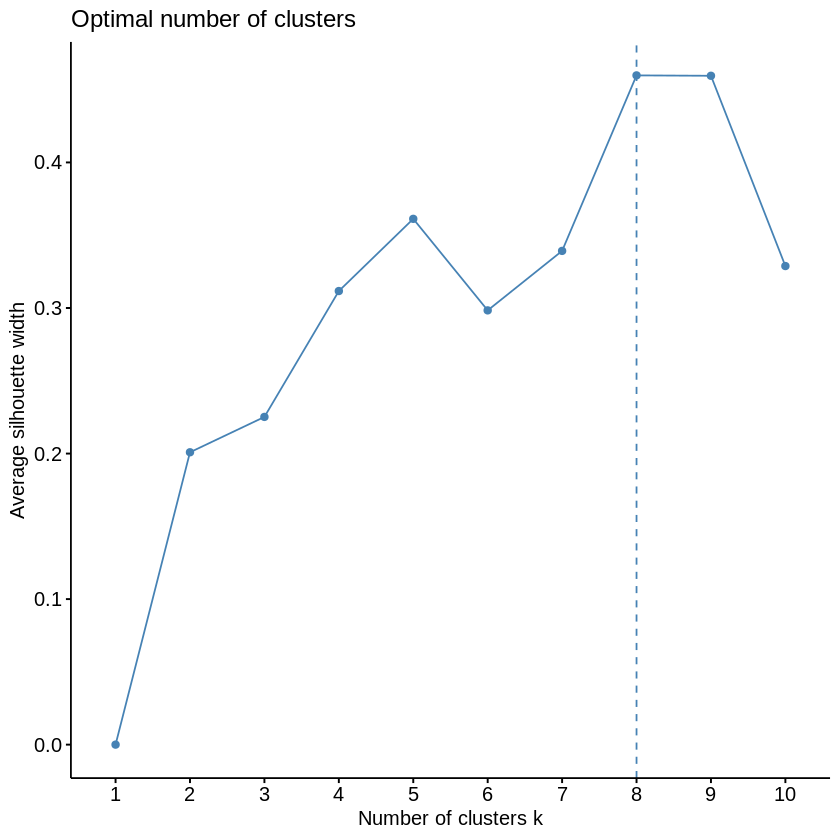

In [64]:
#Clustering
set.seed(123)
#Determining the number of optimal clusters 
#Determining optimal number of Clusters (Cluster silhoutte Method )
fviz_nbclust(normalized, FUN = kmeans, method = "silhouette")

In [65]:
result<- kmeans(normalized,8) #aplly k-means algorithm with no. of centroids(k)=8

In [66]:
result$size  # gives no. of records in each cluster

[1] 1159 1423  566 2174  347 1228  533 1526

In [67]:
result$centers # gives value of cluster center datapoint                      #value(3 centers for k=3)

administrative administrative_duration informational informational_duration
1 0.104903653    0.04274284              0.0336496980  0.01647802            
2 0.122042633    0.04373755              0.0296468728  0.01371690            
3 0.001030624    0.00000000              0.0006625442  0.00000000            
4 0.098781049    0.03872324              0.0309625115  0.01281788            
5 0.129082613    0.04744510              0.0326008646  0.01425654            
6 0.098873507    0.03854130              0.0315553746  0.01518721            
7 0.090603502    0.03855328              0.0250938086  0.01109789            
8 0.106378331    0.04050245              0.0353866317  0.01618864            
  productrelated productrelated_duration bouncerates exitrates pagevalues
1 0.111395706    0.290759064             0.03369860  0.1195598 0.01602676
2 0.125182382    0.254539590             0.05528113  0.1476881 0.01847761
3 0.007344436    0.002505356             0.99173047  0.9950005 0.00000000
4 0.134201179    0.307807716             0.05669666  0.1487563 0.02013059
5 0.145138988    0.277806623             0.06372485  0.1500044 0.01813105
6 0.123395072    0.293063590             0.03929893  0.1335654 0.02313437
7 0.134310401    0.315142744             0.05977443  0.1505051 0.02530640
8 0.152871895    0.351438146             0.03848658  0.1286285 0.02177160
  specialday ⋯ monthJune  monthMar  monthMay  monthNov  monthOct   monthSep  
1 0.00000000 ⋯ 0.00000000 1.0000000 0.0000000 0.0000000 0.00000000 0.00000000
2 0.01335207 ⋯ 0.14054814 0.0000000 0.0000000 0.0000000 0.31763879 0.25368939
3 0.07243816 ⋯ 0.04770318 0.1413428 0.3144876 0.2349823 0.01236749 0.01236749
4 0.20505980 ⋯ 0.00000000 0.0000000 1.0000000 0.0000000 0.00000000 0.00000000
5 0.00000000 ⋯ 0.00000000 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000
6 0.00000000 ⋯ 0.00000000 0.0000000 0.0000000 0.0000000 0.00000000 0.00000000
7 0.00000000 ⋯ 0.00000000 0.0000000 0.0000000 1.0000000 0.00000000 0.00000000
8 0.00000000 ⋯ 0.00000000 0.0000000 0.0000000 1.0000000 0.00000000 0.00000000
  operatingsystems browser    region    traffictype
1 0.1559226        0.10648548 0.2535591 0.11566232 
2 0.1536994        0.10705083 0.2822382 0.14139882 
3 0.1693589        0.11307420 0.2882067 0.20968942 
4 0.1625706        0.11645201 0.2709867 0.17590665 
5 0.1490325        0.11239193 0.2766571 0.12589110 
6 0.1769428        0.12981813 0.2908184 0.15382308 
7 0.1777003        0.11022514 0.2485929 0.53707910 
8 0.1511889        0.09840542 0.2629423 0.06301304

In [68]:
result$cluster #gives cluster vector showing the custer where 

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   2    2    2    2    2    2    2    3    3    2    2    2    2    2    2    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    3    3    2    2    2    2    3    3    2    2    3    3    2    2    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   2    2    2    2    2    2    2    3    3    2    2    2    2    2    2    2 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   2    3    2    2    2    2    2    2    2    2    2    3    2    2    2    2 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   2    2    2    3    2    2    2    3    2    3    2    2    2    2    2    2 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   2    3    2    2    2    2    1    1    1    1    1    1    3    1    1    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   1    1    1    1    1    1    1    1    1    1    1    3    1    1    1    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    1    3    1    1    1    1    1    1    1    1    1    3    1    1    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    1    3    1    1    1    1    3    1    1    1    3    1    1    1    1 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   1    1    1    1    1    1    1    1    1    1    3    1    1    1    1    3 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    1    3    1    1    1    1    1    1    1    1    3    1    1    3    1 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   1    1    1    3    1    1    1    1    1    1    1    1    1    1    1    1 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   1    3    1    1    3    1    3    1    1    1    1    1    1    1    1    1 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   1    1    1    1    1    1    1    1    1    1    1    3    1    1    1    1 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   1    1    1    3    1    1    1    1    1    1    3    1    1    1    1    1 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   3    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   1    1    1    3    1    1    1    1    1    1    3    1    1    1    1    1 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   1    1    1    1    1    1    1

In [69]:
result$betweenss / result$totss  #accuracy of the model 

[1] 0.6190301

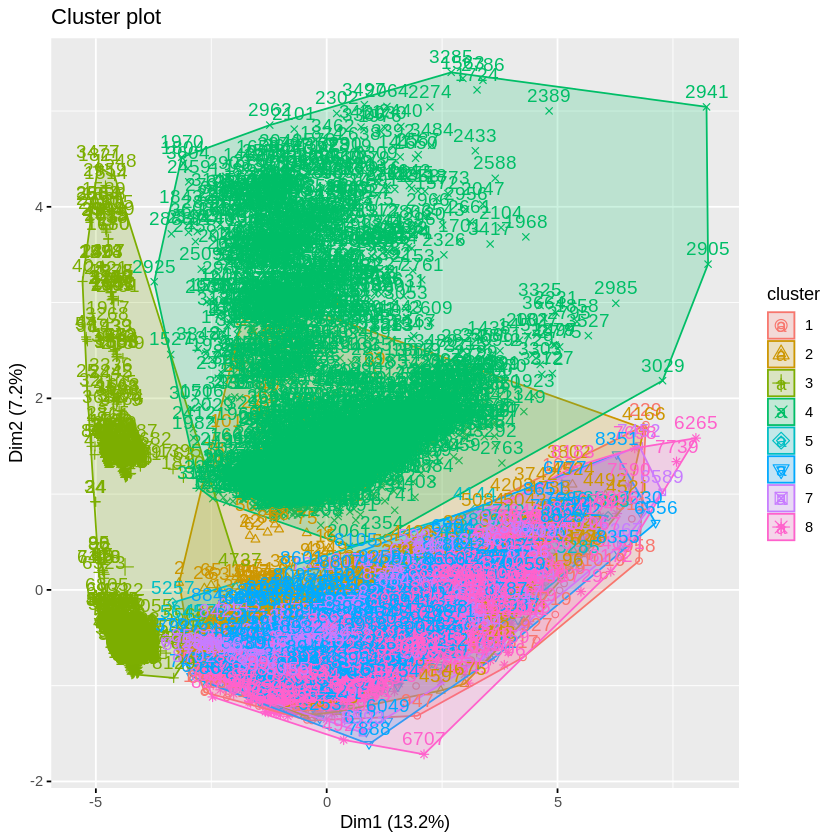

In [70]:
fviz_cluster(result, normalized)

In [71]:
table(result$cluster, shoppers1$revenue)

   
    FALSE TRUE
  1   996  163
  2  1173  250
  3   563    3
  4  1860  314
  5   282   65
  6  1046  182
  7   387  146
  8  1156  370

##**Hierachical clustering**

In [72]:
d <- dist(normalized, method = "euclidean")

In [73]:
# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

In [74]:
# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

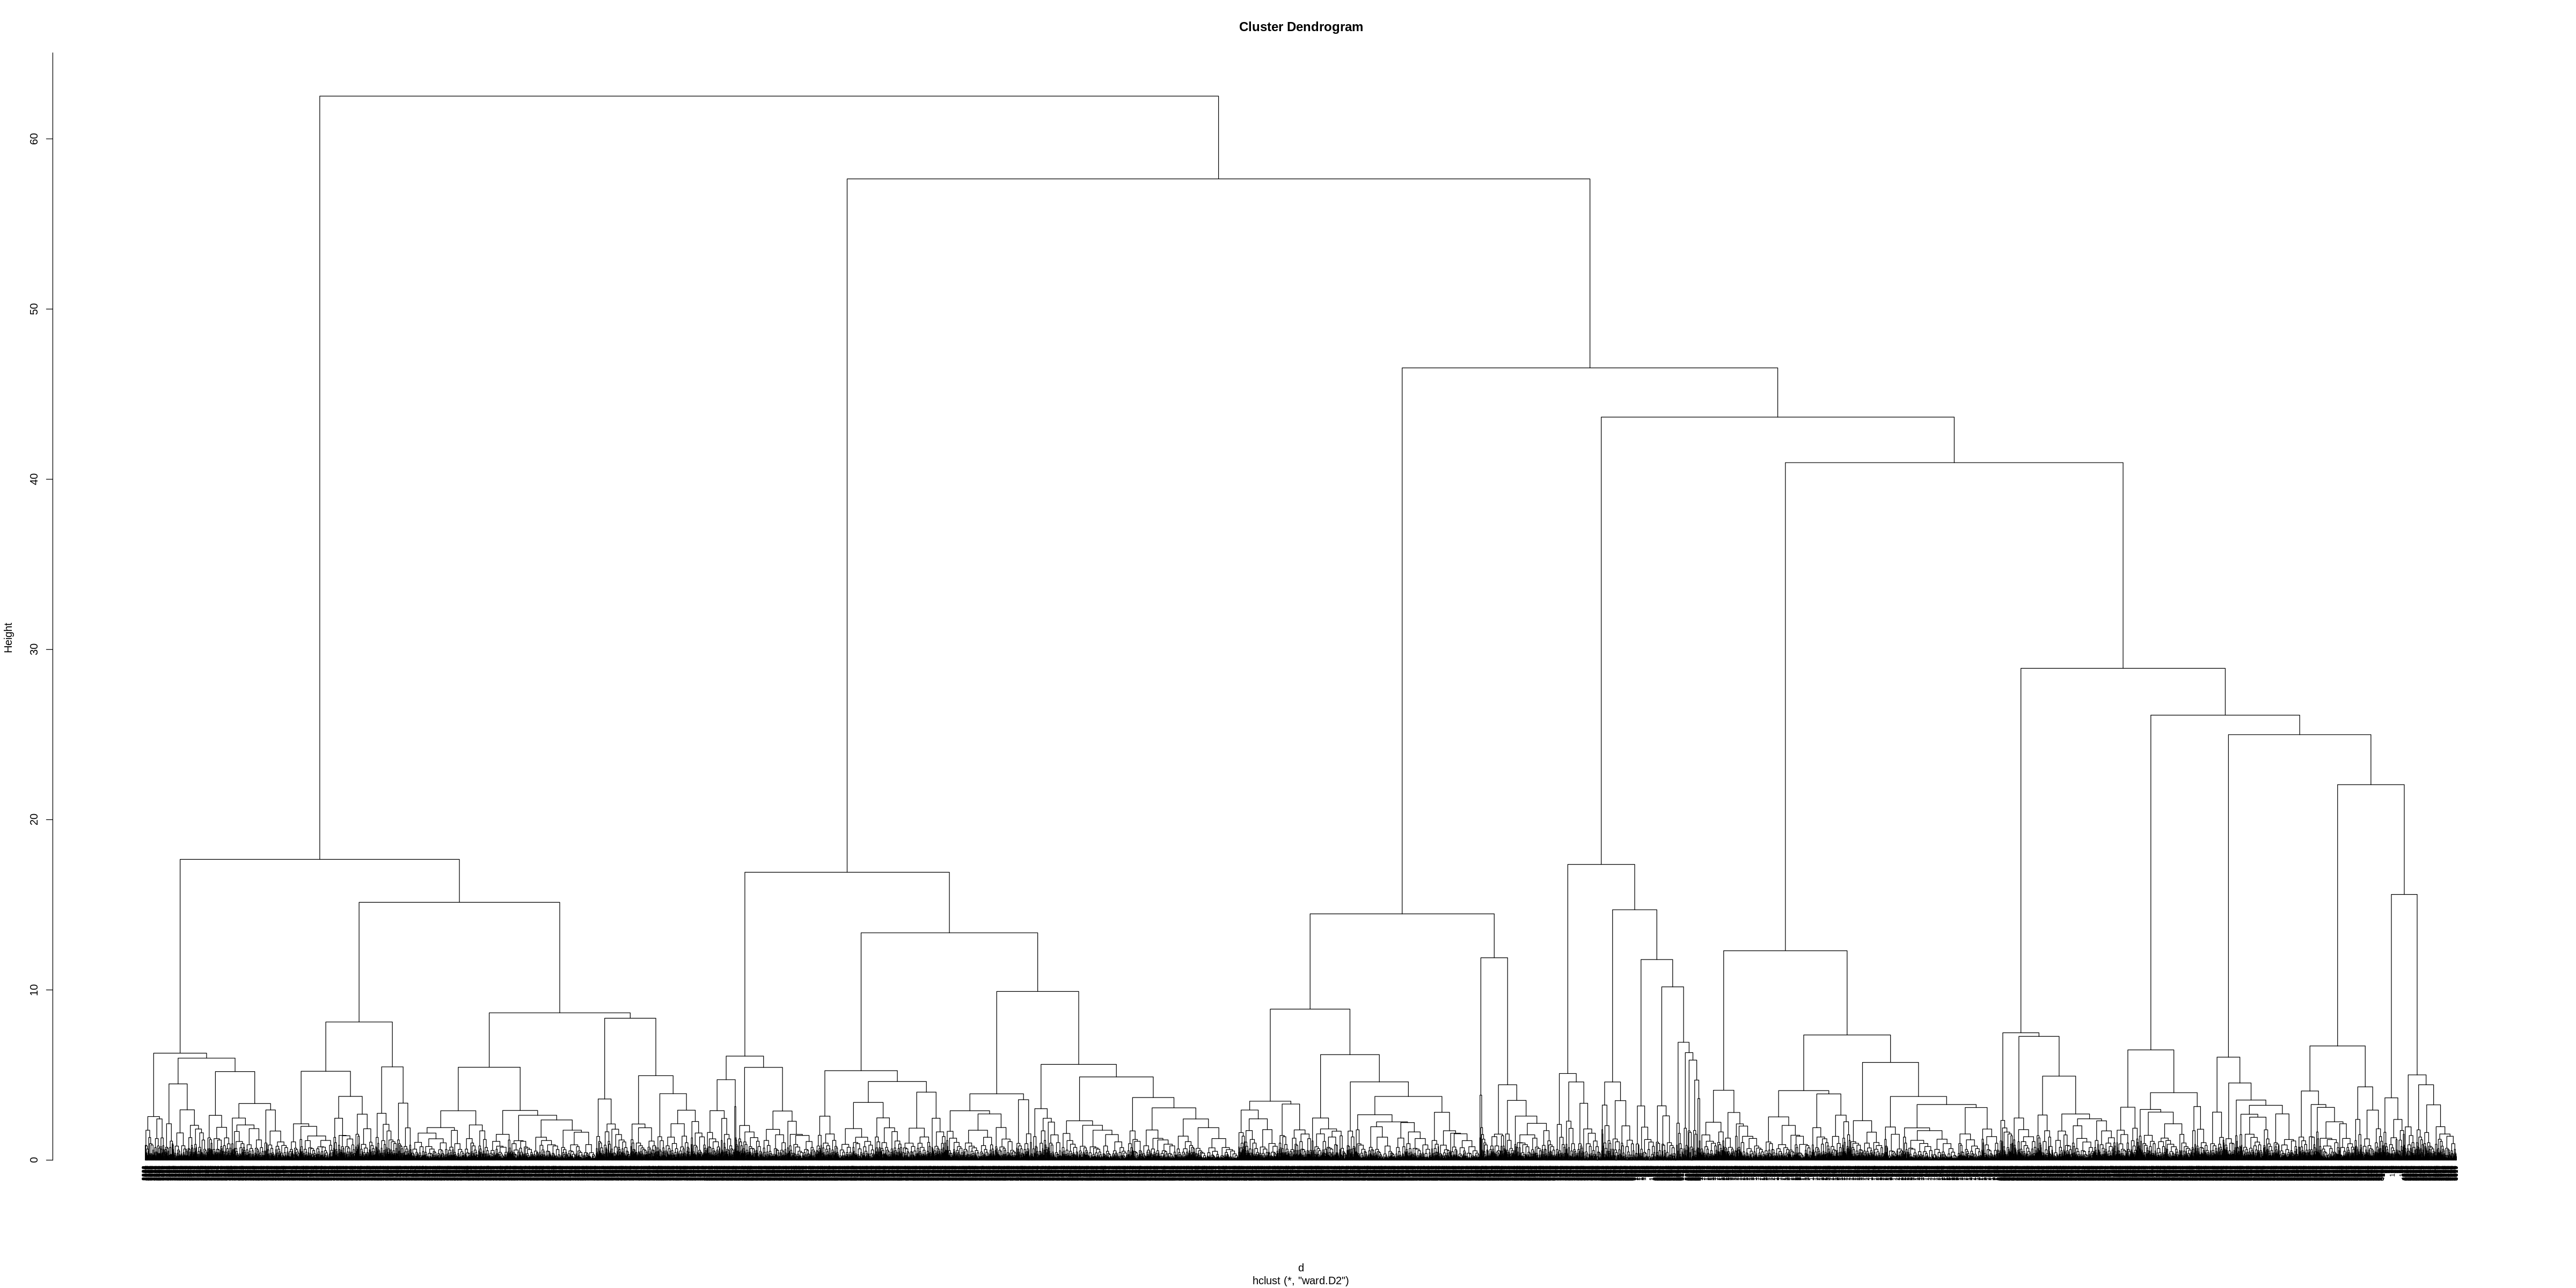

In [94]:
options(repr.plot.width=40 ,repr.plot.height=20 )
plot(res.hc, cex = 0.6, hang = -1)


#**Challenge the Solution**

K-means clustering 

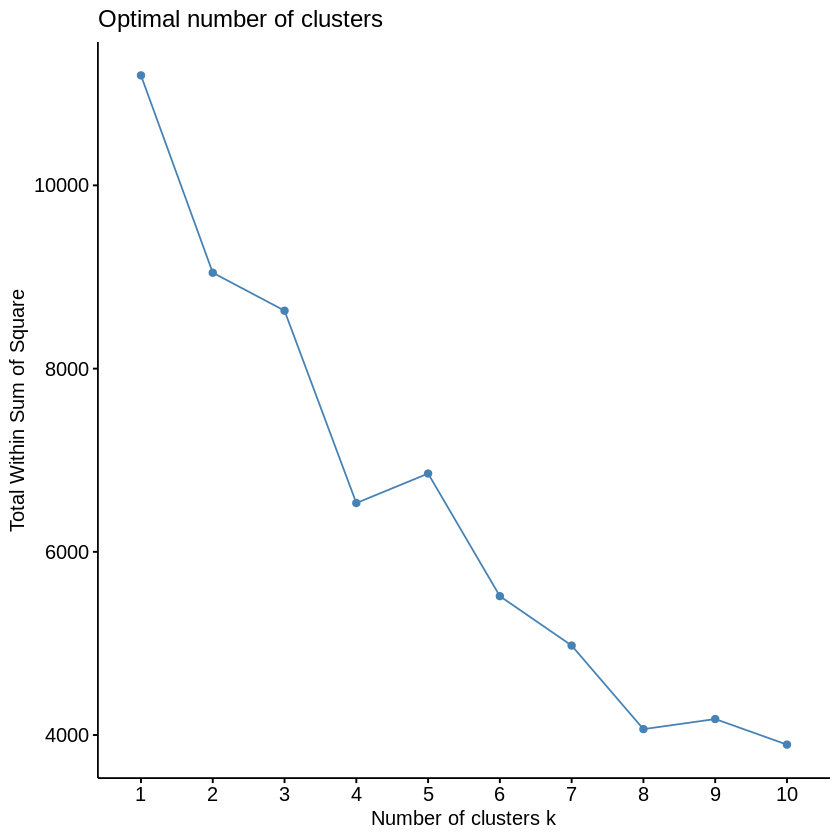

In [81]:
#Determining optimal number of Clusters (Cluster elbow method)
fviz_nbclust(normalized, FUN = kmeans, method = "wss")

In [82]:
result1<- kmeans(normalized,4) #aplly k-means algorithm with no. of centroids(k)=4

In [83]:
result1$size  # gives no. of records in each cluster

[1] 4141 2059  582 2174

In [84]:
result1$centers # gives value of cluster center datapoint   

administrative administrative_duration informational informational_duration
1 0.111426387    0.0423291564            0.0316952427  0.01502393            
2 0.102294803    0.0399978793            0.0327221952  0.01487083            
3 0.001073883    0.0004890207            0.0006443299  0.00000000            
4 0.098781049    0.0387232425            0.0309625115  0.01281788            
  productrelated productrelated_duration bouncerates exitrates pagevalues
1 0.122743905    0.278461065             0.04306662  0.1337232 0.01921496
2 0.148067001    0.342042591             0.04399723  0.1342916 0.02268663
3 0.008606475    0.006514329             0.98122666  0.9866366 0.00000000
4 0.134201179    0.307807716             0.05669666  0.1487563 0.02013059
  specialday  ⋯ monthJune  monthMar  monthMay  monthNov  monthOct   monthSep  
1 0.004588264 ⋯ 0.04829751 0.2791596 0.0000000 0.0000000 0.10915238 0.08717701
2 0.000000000 ⋯ 0.00000000 0.0000000 0.0000000 1.0000000 0.00000000 0.00000000
3 0.070446735 ⋯ 0.04639175 0.1426117 0.3058419 0.2285223 0.01202749 0.01202749
4 0.205059798 ⋯ 0.00000000 0.0000000 1.0000000 0.0000000 0.00000000 0.00000000
  operatingsystems browser   region    traffictype
1 0.1607272        0.1142437 0.2762920 0.1360083  
2 0.1580518        0.1014651 0.2592278 0.1857314  
3 0.1696122        0.1118270 0.2880155 0.2118828  
4 0.1625706        0.1164520 0.2709867 0.1759066

In [85]:
result1$cluster #gives cluster vector showing the custer where

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    1    1    1    1    1    3    3    1    1    1    1    1    1    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    3    3    1    1    1    1    3    3    1    1    3    3    1    1    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    1    1    1    1    1    3    3    1    1    1    1    1    1    1 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    3    1    1    1    1    1    1    1    1    1    3    1    1    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   1    1    1    3    1    1    1    3    1    3    1    1    1    1    1    1 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   1    3    1    1    1    1    1    1    1    1    1    1    3    1    1    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   1    1    1    1    1    1    1    1    1    1    1    3    1    1    1    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    1    3    1    1    1    1    1    1    1    1    1    3    1    1    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    1    3    1    1    1    1    3    1    1    1    3    1    1    1    1 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   1    1    1    1    1    1    1    1    1    1    3    1    1    1    1    3 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    1    3    1    1    1    1    1    1    1    1    3    1    1    3    1 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   1    1    1    3    1    1    1    1    1    1    1    1    1    1    1    1 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   1    3    1    1    3    1    3    1    1    1    1    1    1    1    1    1 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   1    1    1    1    1    1    1    1    1    1    1    3    1    1    1    1 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   1    1    1    3    1    1    1    1    1    1    3    1    1    1    1    1 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   3    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   1    1    1    3    1    1    1    1    1    1    3    1    1    1    1    1 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   1    1    1    1    1    1    1

In [86]:
result1$betweenss / result$totss

[1] 0.4103633

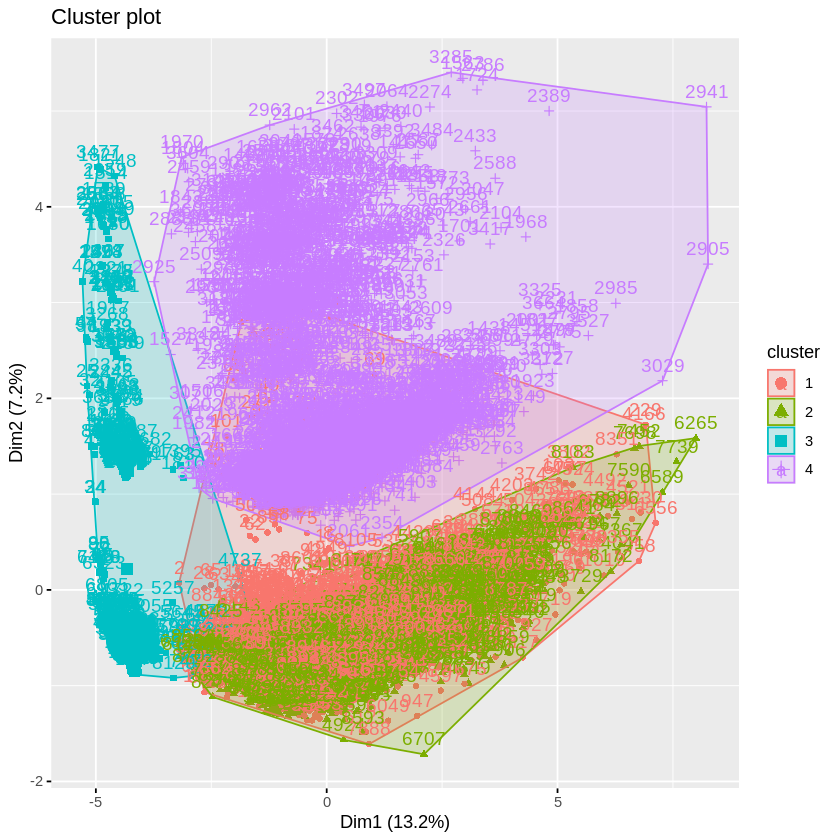

In [87]:
fviz_cluster(result1, normalized)

In [88]:
table(result1$cluster, shoppers1$revenue)

   
    FALSE TRUE
  1  3481  660
  2  1543  516
  3   579    3
  4  1860  314

**Hierarchical Clustering**

In [89]:
#calculate manhattan distance

data2di <- dist(normalized, method = "man")

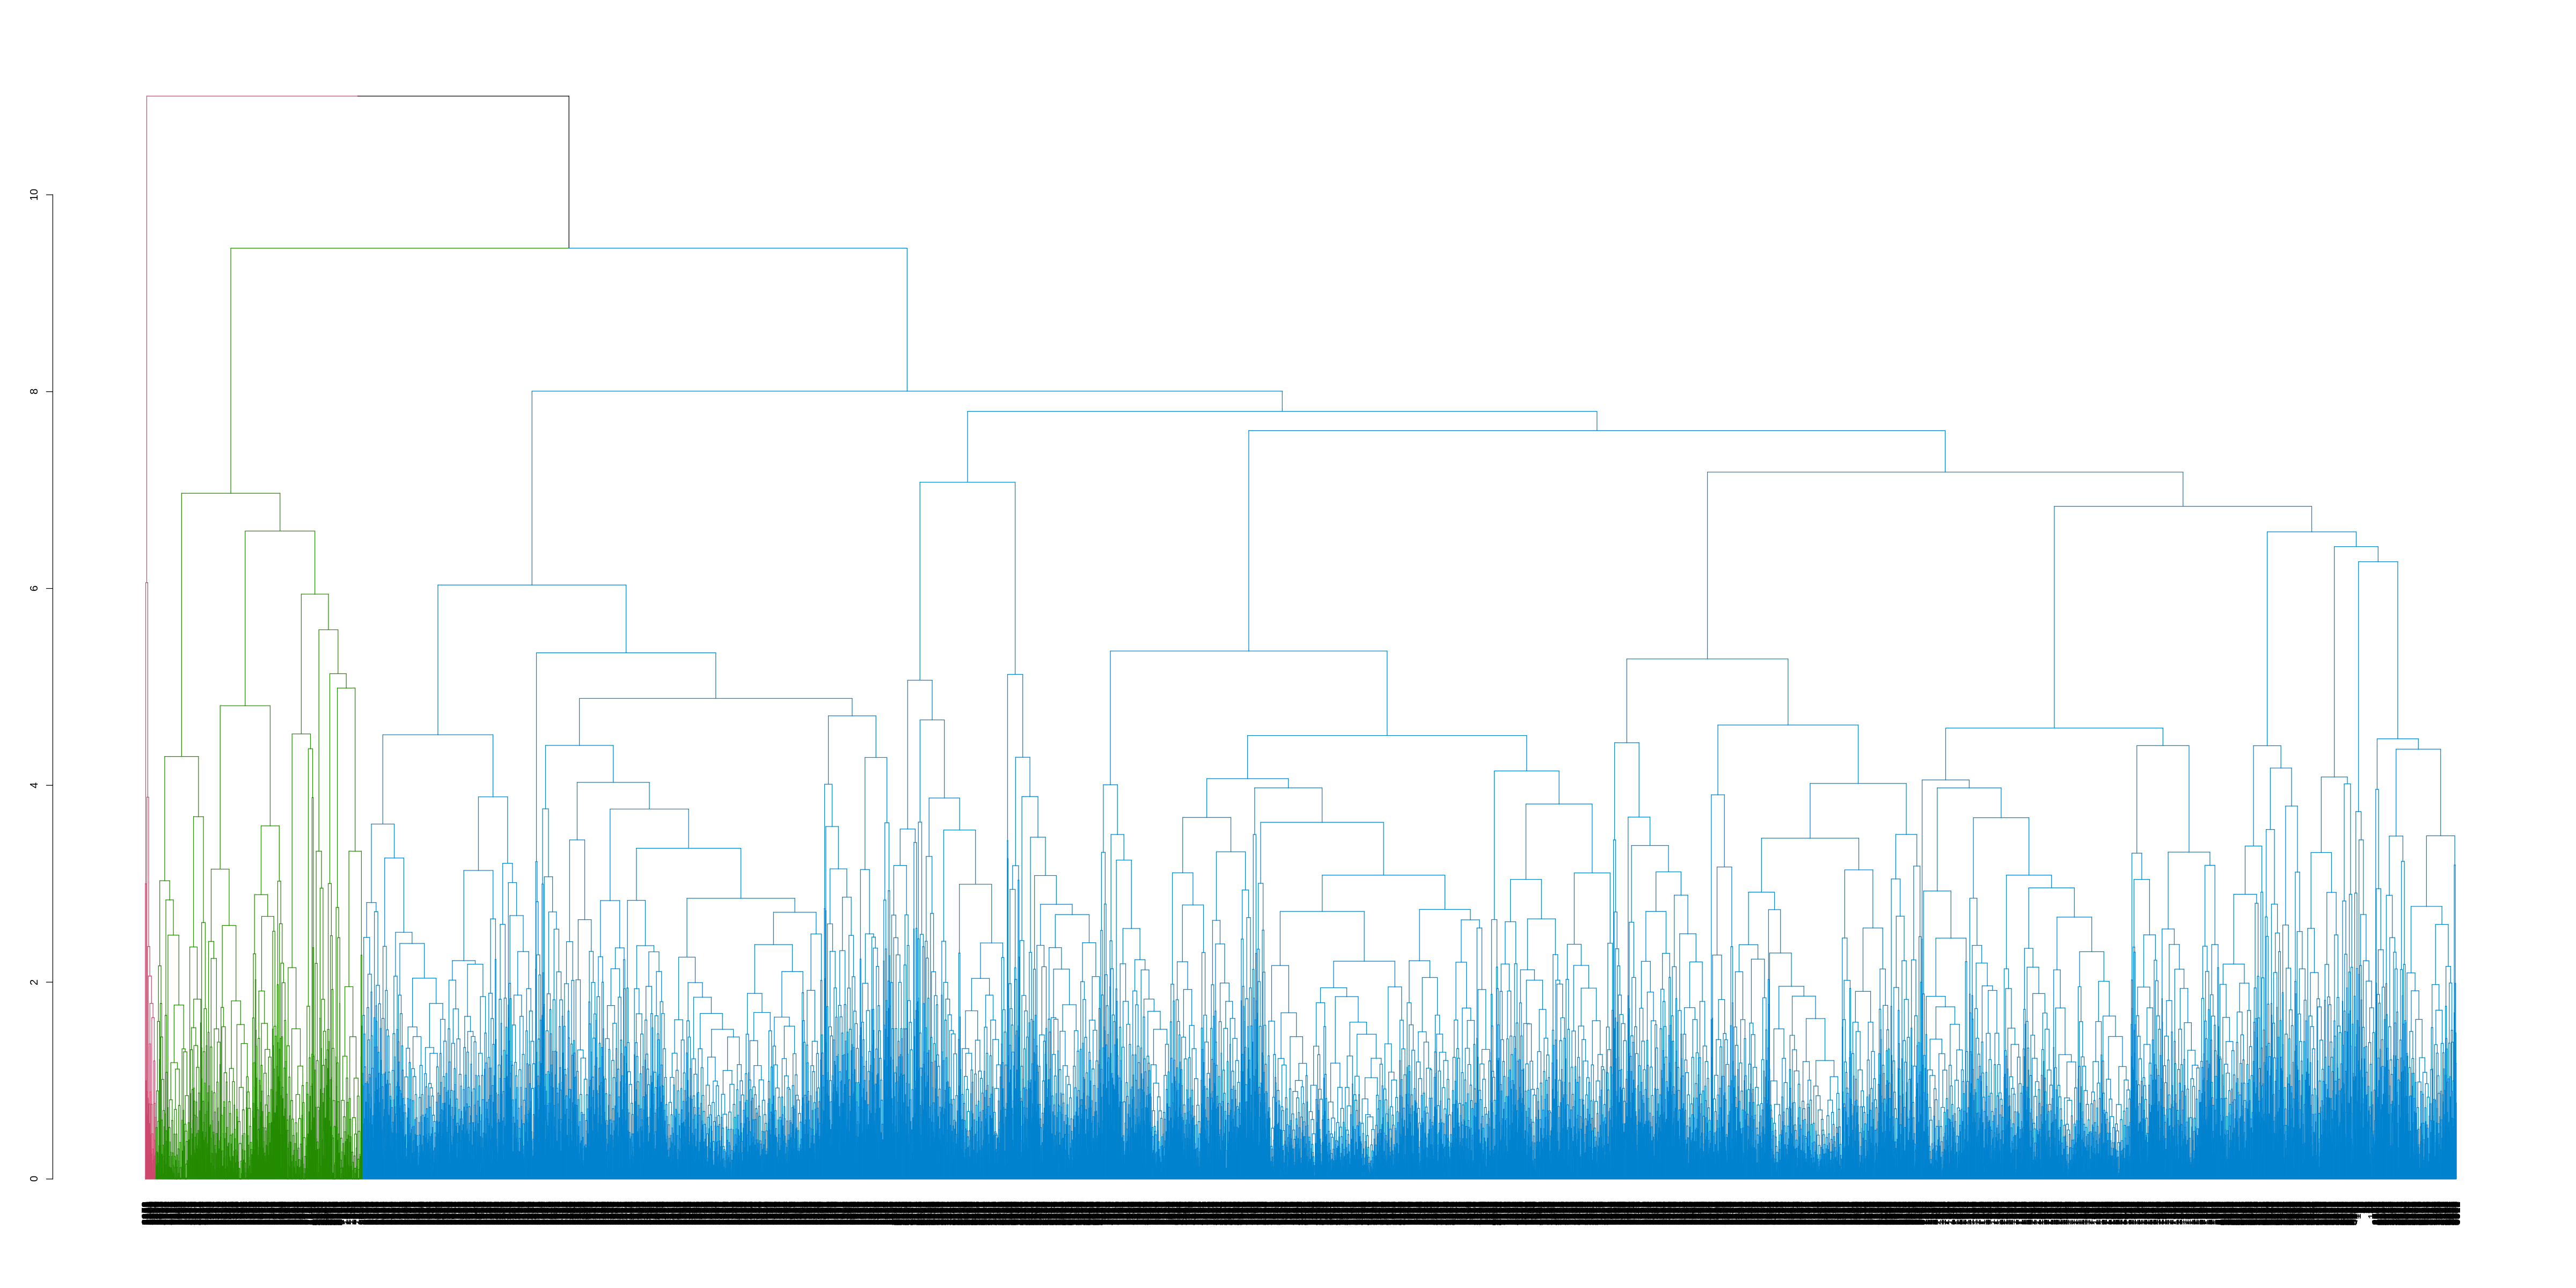

In [95]:
## We then hierarchical clustering using the complete method
data2hc <- hclust(data2di, method = "complete")
data2as <- cutree(data2hc, k = 3)

dend_data <- as.dendrogram(data2hc)
cc <- color_branches(dend_data, k=3)

options(repr.plot.width=40 ,repr.plot.height=20 )
plot(cc)

  cluster size ave.sil.width
1       1  801          0.29
2       2 8114          0.27
3       3   41          0.70


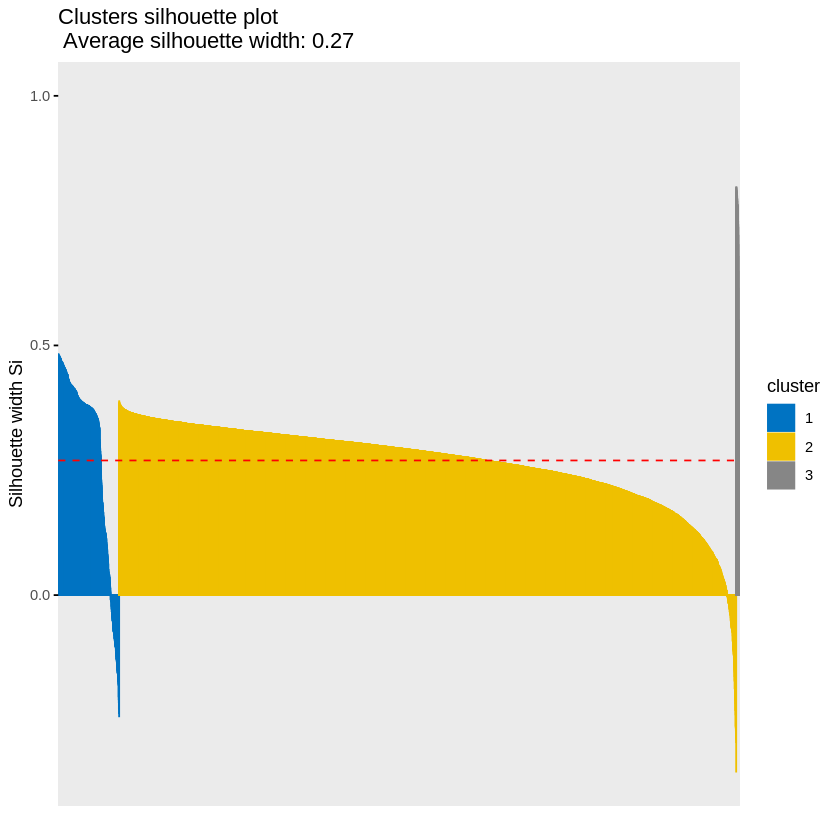

In [91]:
sil <- silhouette(data2as, data2di)

fviz_silhouette(sil,palette= "jco",ggtheme = theme_minimal())

We could also do PCA for dimensional reduction annd then do k-means and hieranchical clustering

**Summary**


 k-means may be computationally faster than hierarchical clustering if the number of clusters is small. 

 Hierarchical clustering  is also easy to implement. Required less codes to implement 


 
 On the other hand, the result of a hierarchical clustering is a structure that is more informative and interpretable than the unstructured set of flat clusters returned by k-means. Therefore, it is easier to determine the optimal number of clusters by looking at the dendrogram of a hierarchical clustering than trying to predict this optimal number in advance in case of k-means.

 High space and time complexity for Hierarchical clustering. Hence this clustering algorithm is difficult to use  when we have huge data.

#**Follow up Questions**

Are there more models to improve the getting of characteristics 